In [1]:
from netCDF4 import Dataset
import pandas as pd
import numpy as np
import matplotlib as mpl
import copy

import os, sys
import pickle as pkl
from scipy import interpolate
import scipy as sp

sys.path.append(r"C:\Users\mikek\OneDrive\Project\DLS\DLS-git")
from LRBv21 import LRBv21
from AnalyticCoolingCurves import *
from unpackConfigurationsMK import *
from refineGrid import refineGrid
from Morph import Profile, Morph

onedrive_path = onedrive_path = str(os.getcwd()).split("OneDrive")[0] + "OneDrive"
sys.path.append(os.path.join(onedrive_path, r"Project\python-packages\sdtools"))

from DLS.postprocess import *

from code_comparison.solps_pp import *
import general.plotstyle

%matplotlib inline

%load_ext autoreload
%autoreload 2


# Read balance file

In [2]:
balance_path = r"C:\Users\mikek\OneDrive\Project\DLS\from_stuart\2023-07-11 - SPR45 balance file\balance.nc"
eqb = dict()
eqb["SPR45"] = dict()

for side in ["il", "ol", "iu", "ou"]: # Inner lower, outer lower.
    eqb["SPR45"][side] = unpackConfigurationMK(File = balance_path, Type = side, sepadd=0, resolution = 2000)
    
    keys = list(eqb["SPR45"][side].keys())
    for key in keys:
        
        if key not in ["Bpol", "Btot", "Xpoint", "Spol", "S", "R", "Z"]:
            eqb["SPR45"][side].pop(key, None)
        
# file_write(eqb, "equilibrium.pkl")

In [3]:
%matplotlib inline
plt.close("all")

# Morphs

In [40]:
allprofiles = {}

## 1. Increase flux expansion

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


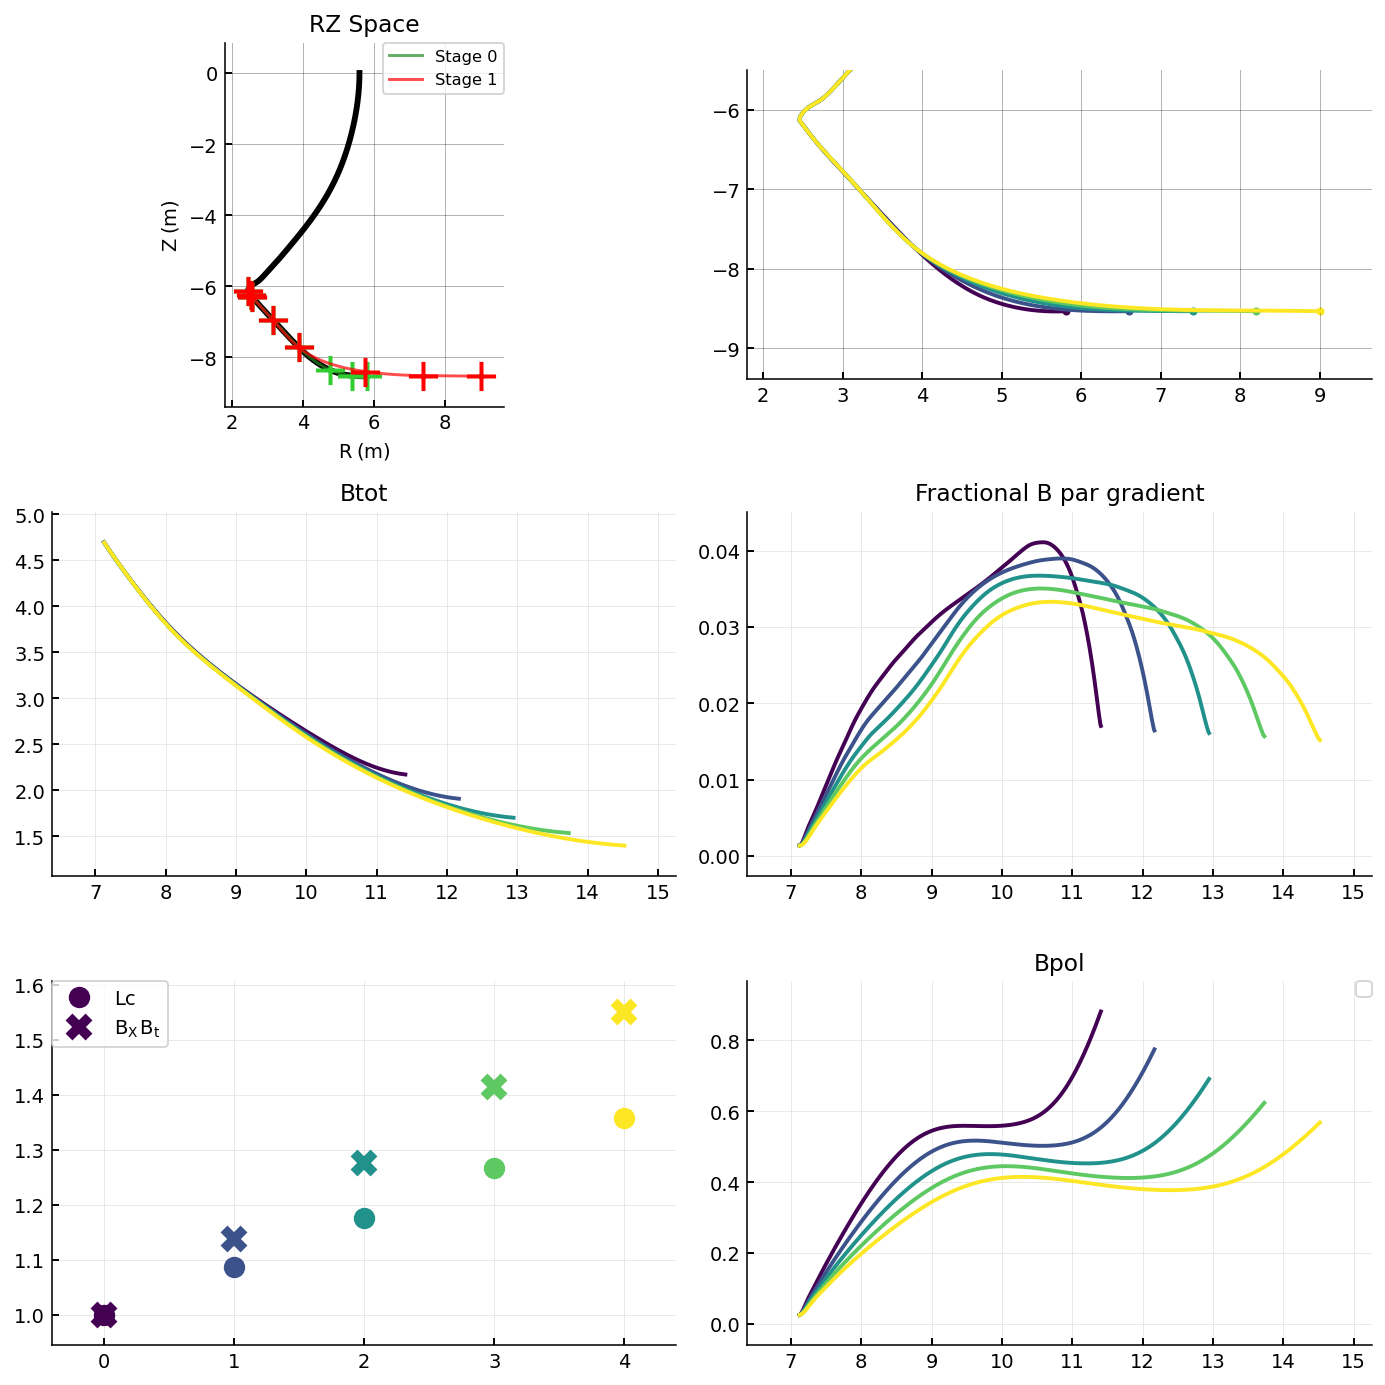

In [41]:
plt.close("all")
d = eqb["SPR45"]["ol"]
base = Profile(d["R"], d["Z"], d["Xpoint"], d["Btot"], d["Bpol"], d["S"], d["Spol"])
base_offsets = [
    {"pos" : 1},
    {"pos" : 0.97},
    {"pos" : 0.95},
    {"pos" : 0.75},
    {"pos" : 0.5},
    {"pos" : 0.25},
    {"pos" : 0.10},
    {"pos" : 0.0}]

offsets_stage1 = [
    {"pos" : 1,     "offsetx": 0, "offsety": 0},
    {"pos" : 0.97,  "offsetx": 0, "offsety": 0},
    {"pos" : 0.95,  "offsetx": 0, "offsety": 0},
    {"pos" : 0.75,  "offsetx": 0, "offsety": 0},
    {"pos" : 0.5,   "offsetx": 0, "offsety": 0},
    {"pos" : 0.25,  "offsetx": 1, "offsety": -0.05},
    {"pos" : 0.10,  "offsetx": 2, "offsety": 0},
    {"pos" : 0.0,   "offsetx": 3.2, "offsety": 0},
    ]


# Make stage 0 by copying the base profile
stage0 = base.copy()
stage0.offset_control_points(base_offsets)
stage0.name = "Stage 0"

# Make stage 1 by offsetting stage 0
stage1 = base.copy()
stage1.offset_control_points(offsets_stage1)
stage1.recalculate_topology()
stage1.name = "Stage 1"

profiles = {}
for i in np.linspace(0,1,5):
    profiles[i] = base.copy()
    profiles[i].offset_control_points(offsets_stage1, factor = i)
    profiles[i].recalculate_topology()
    profiles[i].name = i
    
plot_profiles(base, [stage0, stage1], profiles)

allprofiles["farther_strike"] = copy.deepcopy(profiles)

## Move down

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


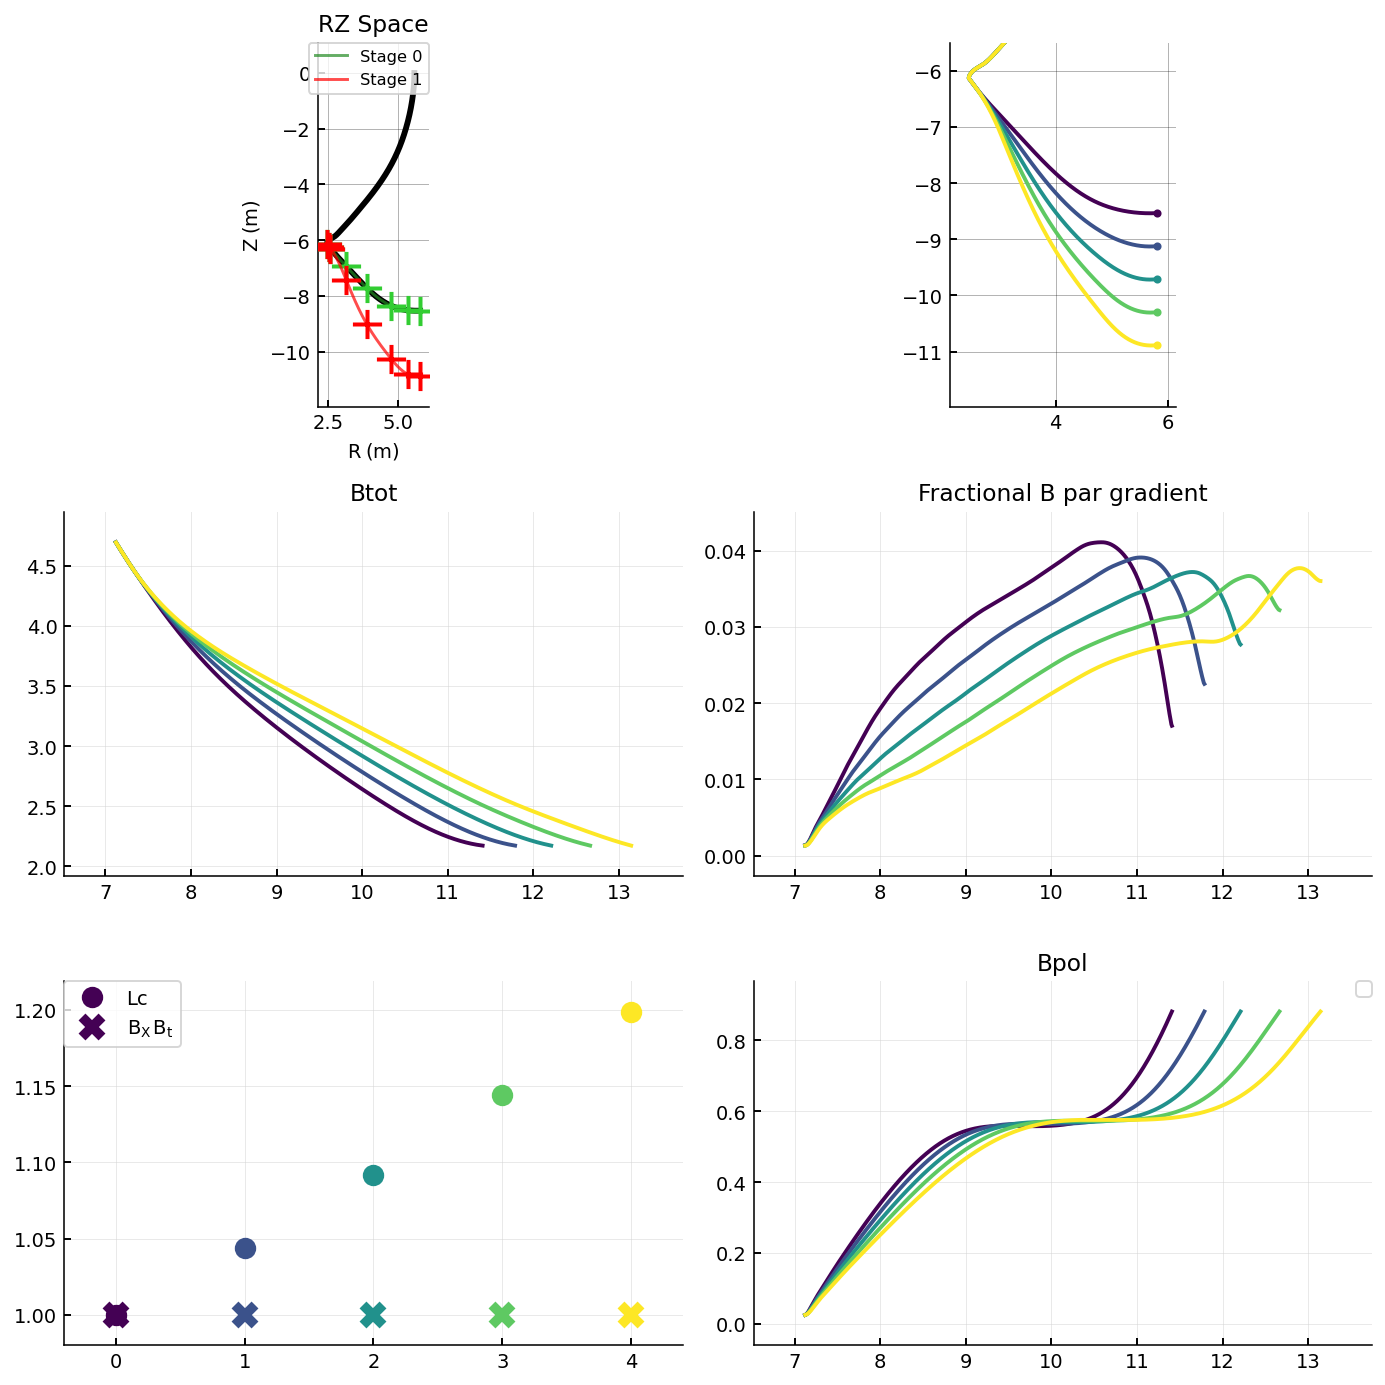

In [42]:
plt.close("all")
d = eqb["SPR45"]["ol"]
base = Profile(d["R"], d["Z"], d["Xpoint"], d["Btot"], d["Bpol"], d["S"], d["Spol"])
base_offsets = [
    {"pos" : 1},
    {"pos" : 0.97},
    {"pos" : 0.95},
    {"pos" : 0.75},
    {"pos" : 0.5},
    {"pos" : 0.25},
    {"pos" : 0.10},
    {"pos" : 0.0}]

offsets_stage1 = [
    {"pos" : 1,     "offsetx": 0, "offsety": 0},
    {"pos" : 0.97,  "offsetx": 0, "offsety": 0},
    {"pos" : 0.95,  "offsetx": 0, "offsety": 0},
    {"pos" : 0.75,  "offsetx": 0, "offsety": -0.5},
    {"pos" : 0.5,   "offsetx": 0, "offsety": -1.3},
    {"pos" : 0.25,  "offsetx": 0, "offsety": -1.9},
    {"pos" : 0.10,  "offsetx": 0, "offsety": -2.30},
    {"pos" : 0.0,   "offsetx": 0, "offsety": -2.35},
    ]


# Make stage 0 by copying the base profile
stage0 = base.copy()
stage0.offset_control_points(base_offsets)
stage0.name = "Stage 0"

# Make stage 1 by offsetting stage 0
stage1 = base.copy()
stage1.offset_control_points(offsets_stage1)
stage1.recalculate_topology()
stage1.name = "Stage 1"

profiles = {}
for i in np.linspace(0,1,5):
    profiles[i] = base.copy()
    profiles[i].offset_control_points(offsets_stage1, factor = i)
    profiles[i].recalculate_topology()
    profiles[i].name = i
    
plot_profiles(base, [stage0, stage1], profiles)

allprofiles["lower_strike"] = copy.deepcopy(profiles)

## Move up

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


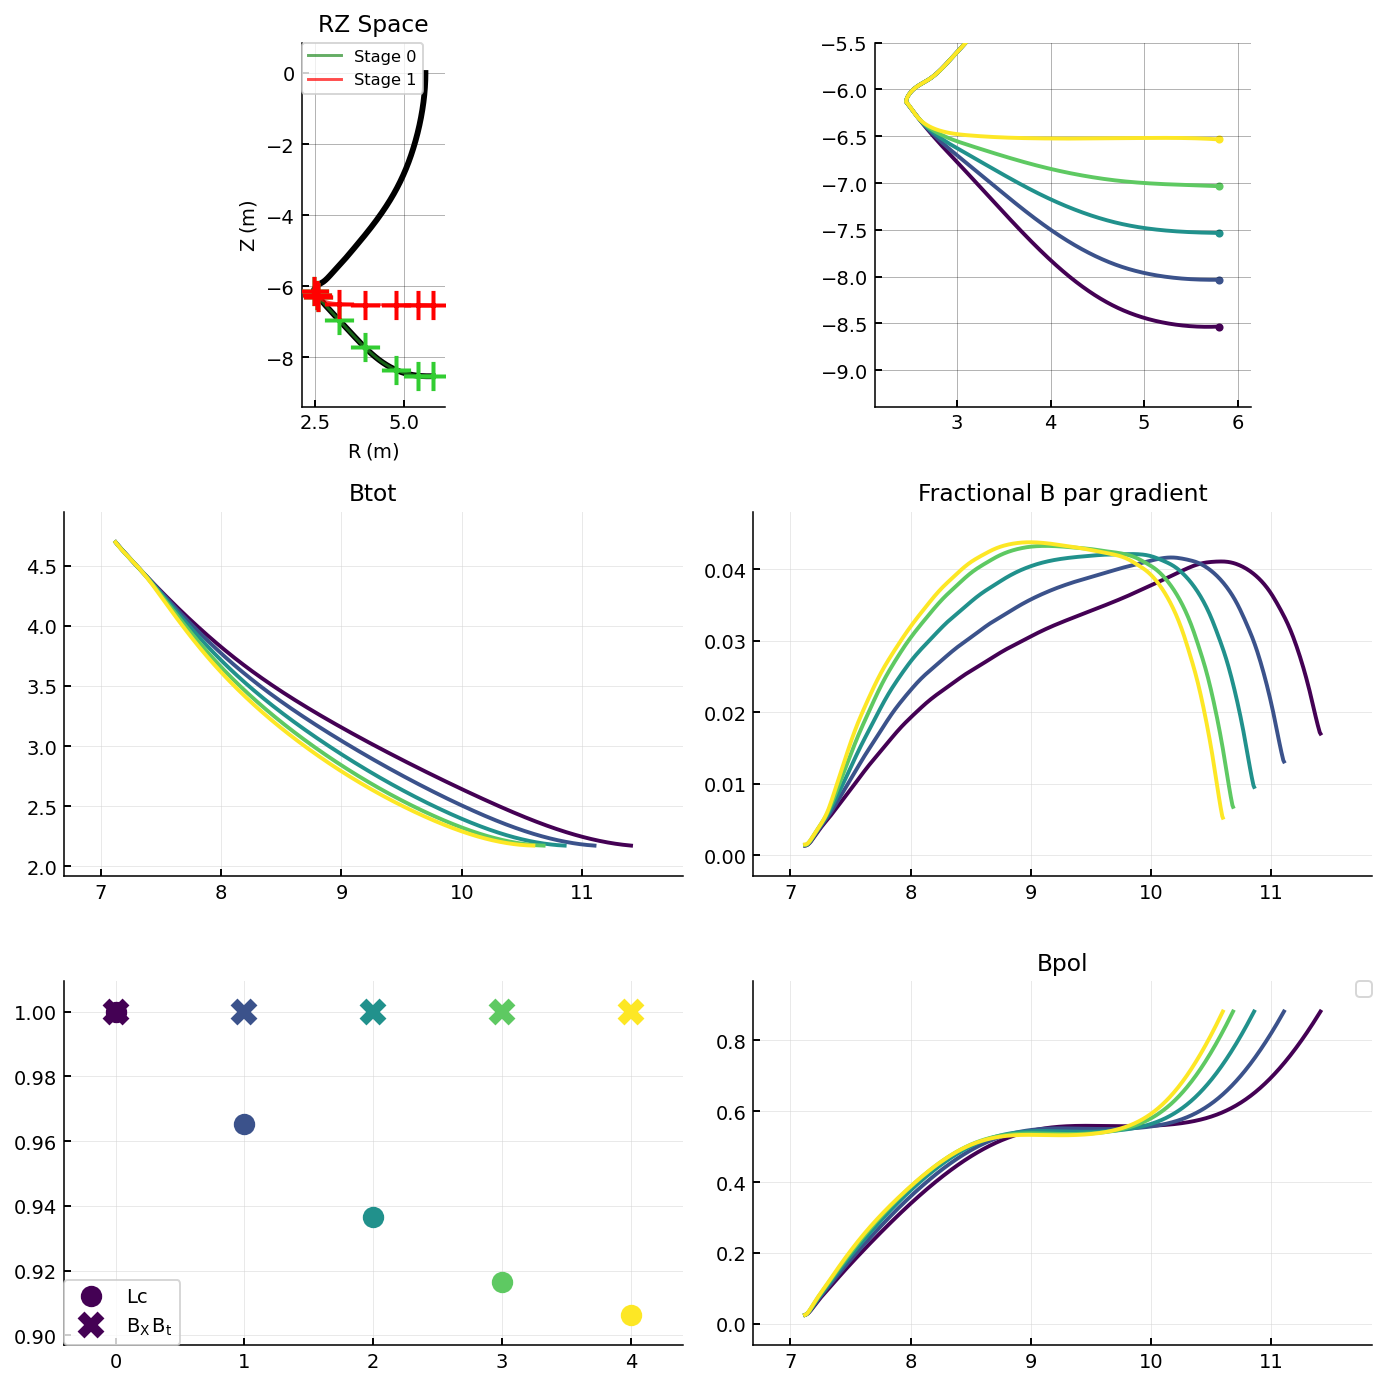

In [43]:
plt.close("all")
d = eqb["SPR45"]["ol"]
base = Profile(d["R"], d["Z"], d["Xpoint"], d["Btot"], d["Bpol"], d["S"], d["Spol"])
base_offsets = [
    {"pos" : 1},
    {"pos" : 0.97},
    {"pos" : 0.95},
    {"pos" : 0.75},
    {"pos" : 0.5},
    {"pos" : 0.25},
    {"pos" : 0.10},
    {"pos" : 0.0}]

offsets_stage1 = [
    {"pos" : 1,     "offsetx": 0, "offsety": 0},
    {"pos" : 0.97,  "offsetx": 0, "offsety": 0},
    {"pos" : 0.95,  "offsetx": 0, "offsety": 0},
    {"pos" : 0.75,  "offsetx": 0, "offsety": 0.45},
    {"pos" : 0.5,   "offsetx": 0, "offsety": 1.2},
    {"pos" : 0.25,  "offsetx": 0, "offsety": 1.83},
    {"pos" : 0.10,  "offsetx": 0, "offsety": 2},
    {"pos" : 0.0,   "offsetx": 0, "offsety": 2},
    ]


# Make stage 0 by copying the base profile
stage0 = base.copy()
stage0.offset_control_points(base_offsets)
stage0.name = "Stage 0"

# Make stage 1 by offsetting stage 0
stage1 = base.copy()
stage1.offset_control_points(offsets_stage1)
stage1.recalculate_topology()
stage1.name = "Stage 1"

profiles = {}
for i in np.linspace(0,1,5):
    profiles[i] = base.copy()
    profiles[i].offset_control_points(offsets_stage1, factor = i)
    profiles[i].recalculate_topology()
    profiles[i].name = i
    
plot_profiles(base, [stage0, stage1], profiles)

allprofiles["higher_strike"] = copy.deepcopy(profiles)

## Poloidal flux expansion

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


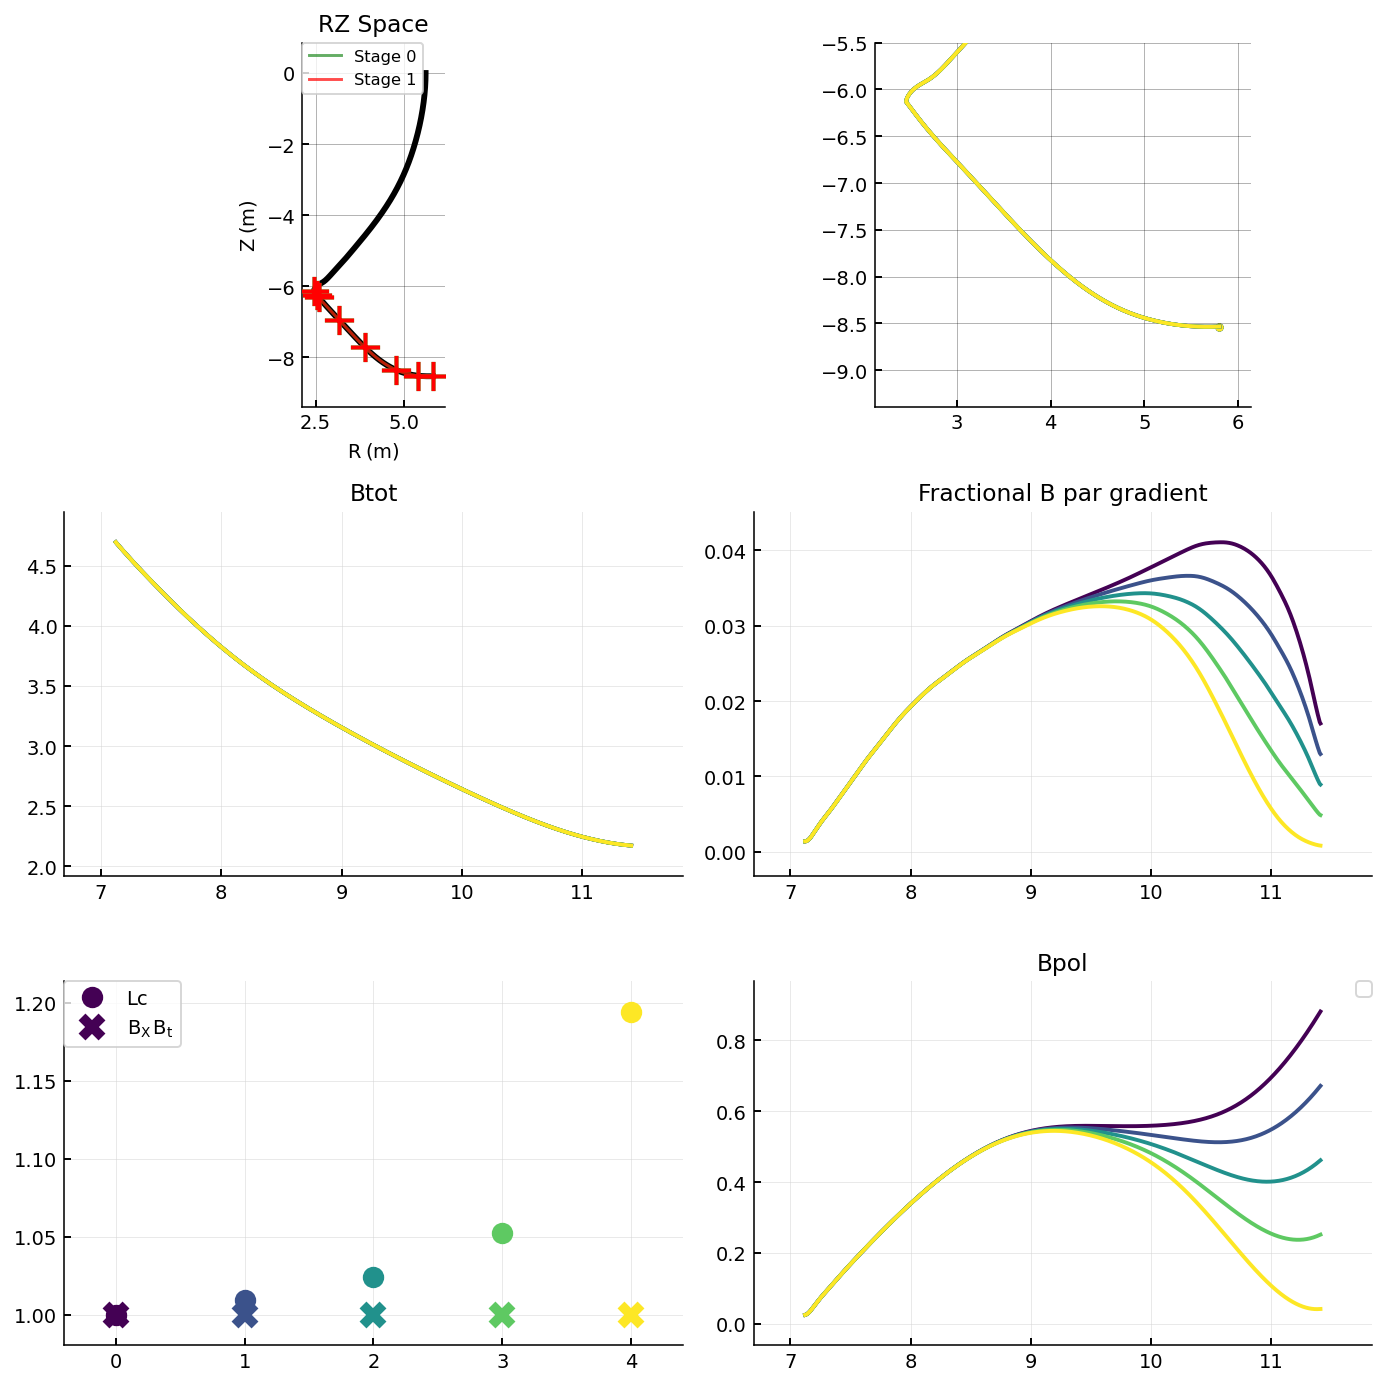

In [44]:
plt.close("all")
d = eqb["SPR45"]["ol"]
base = Profile(d["R"], d["Z"], d["Xpoint"], d["Btot"], d["Bpol"], d["S"], d["Spol"])
base_offsets = [
    {"pos" : 1},
    {"pos" : 0.97},
    {"pos" : 0.95},
    {"pos" : 0.75},
    {"pos" : 0.5},
    {"pos" : 0.25},
    {"pos" : 0.10},
    {"pos" : 0.0}]

offsets_stage1 = [
    {"pos" : 1,     "offsetx": 0, "offsety": 0},
    {"pos" : 0.97,  "offsetx": 0, "offsety": 0},
    {"pos" : 0.95,  "offsetx": 0, "offsety": 0},
    {"pos" : 0.75,  "offsetx": 0, "offsety": 0},
    {"pos" : 0.5,   "offsetx": 0, "offsety": 0},
    {"pos" : 0.25,  "offsetx": 0, "offsety": 0},
    {"pos" : 0.10,  "offsetx": 0, "offsety": 0},
    {"pos" : 0.0,   "offsetx": 0, "offsety": 0},
    ]


# Make stage 0 by copying the base profile
stage0 = base.copy()
stage0.offset_control_points(base_offsets)
stage0.name = "Stage 0"

# Make stage 1 by offsetting stage 0
stage1 = base.copy()
stage1.offset_control_points(offsets_stage1)
stage1.recalculate_topology()
stage1.name = "Stage 1"

profiles = {}
Bpol_gauss_height = [0, 0.1, 0.2, 0.3, 0.4]
for idx, i in enumerate(np.linspace(0,1,5)):
    profiles[i] = base.copy()
    profiles[i].offset_control_points(offsets_stage1, factor = i)
    profiles[i].recalculate_topology(Bpol_shift = dict(width = 0.9, pos = -0.5, height = Bpol_gauss_height[idx]*2.1))
    profiles[i].name = i
    
plot_profiles(base, [stage0, stage1], profiles, poloidal = True)

allprofiles["poloidal_flux_expansion"] = copy.deepcopy(profiles)

## Poloidal flux expansion in middle

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


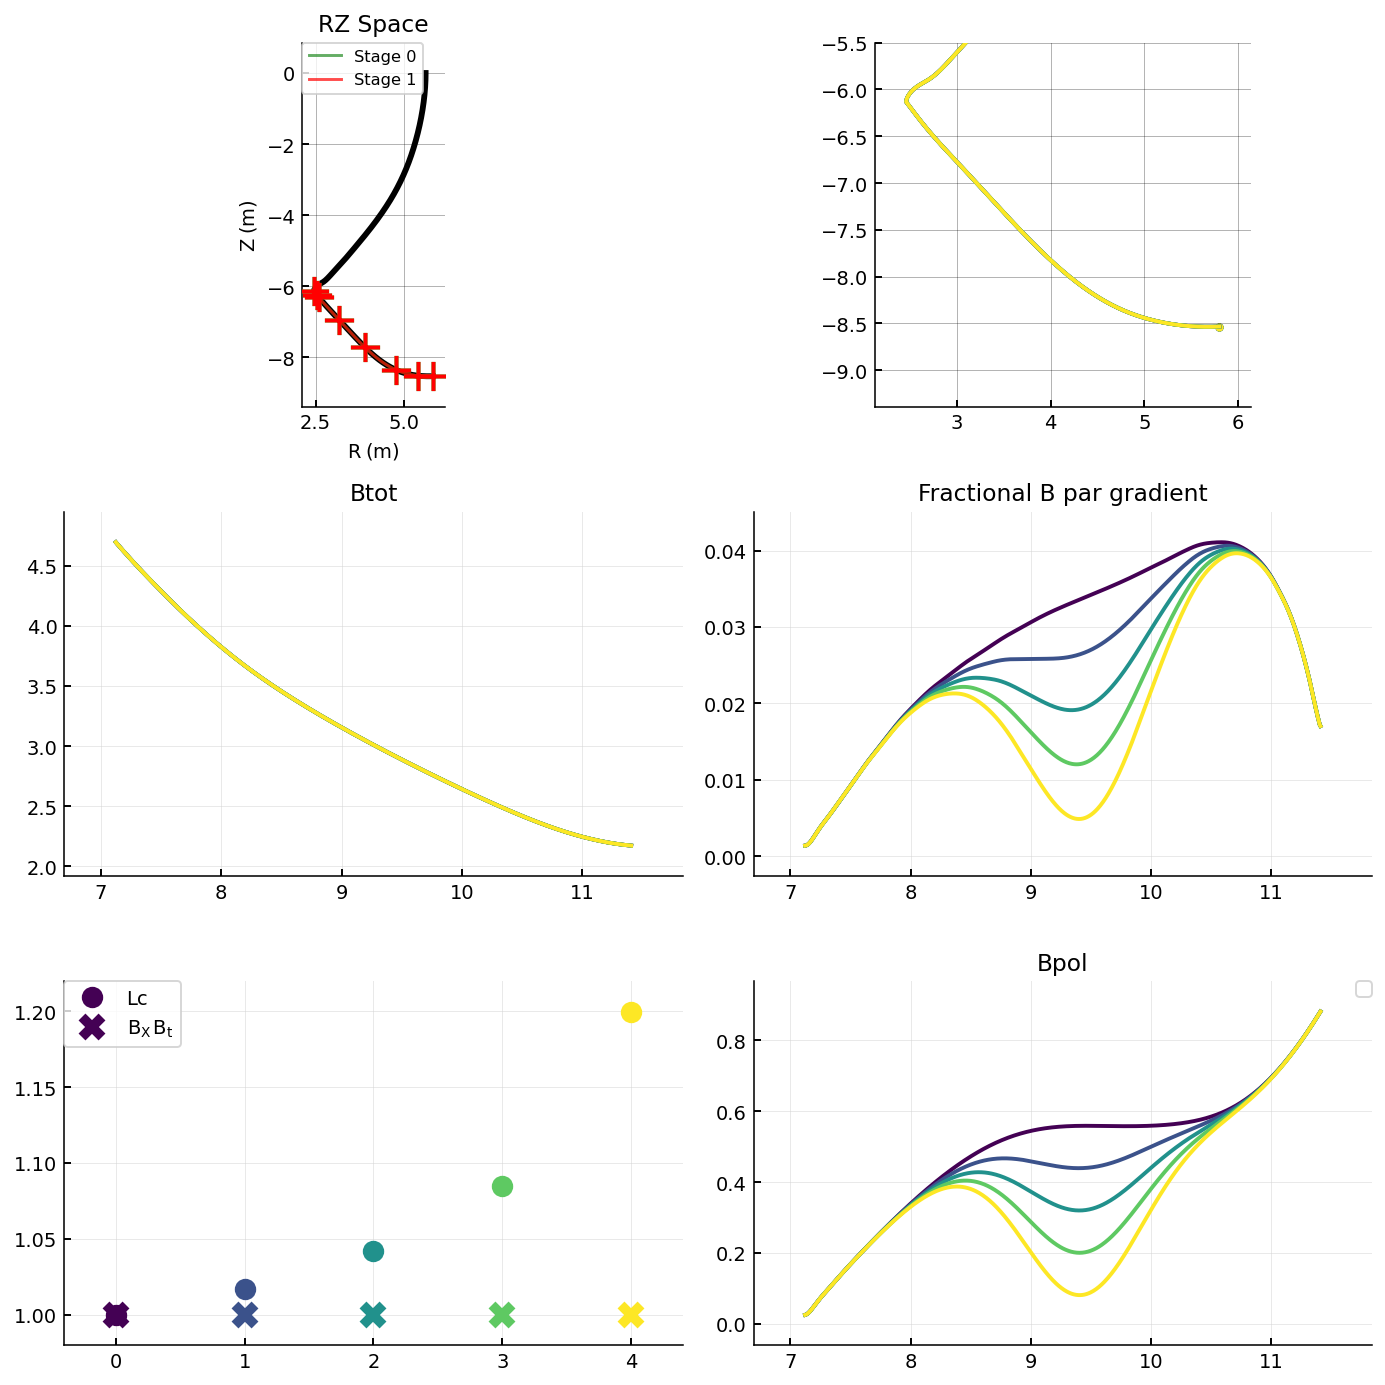

In [45]:
plt.close("all")
d = eqb["SPR45"]["ol"]
base = Profile(d["R"], d["Z"], d["Xpoint"], d["Btot"], d["Bpol"], d["S"], d["Spol"])
base_offsets = [
    {"pos" : 1},
    {"pos" : 0.97},
    {"pos" : 0.95},
    {"pos" : 0.75},
    {"pos" : 0.5},
    {"pos" : 0.25},
    {"pos" : 0.10},
    {"pos" : 0.0}]

offsets_stage1 = [
    {"pos" : 1,     "offsetx": 0, "offsety": 0},
    {"pos" : 0.97,  "offsetx": 0, "offsety": 0},
    {"pos" : 0.95,  "offsetx": 0, "offsety": 0},
    {"pos" : 0.75,  "offsetx": 0, "offsety": 0},
    {"pos" : 0.5,   "offsetx": 0, "offsety": 0},
    {"pos" : 0.25,  "offsetx": 0, "offsety": 0},
    {"pos" : 0.10,  "offsetx": 0, "offsety": 0},
    {"pos" : 0.0,   "offsetx": 0, "offsety": 0},
    ]


# Make stage 0 by copying the base profile
stage0 = base.copy()
stage0.offset_control_points(base_offsets)
stage0.name = "Stage 0"

# Make stage 1 by offsetting stage 0
stage1 = base.copy()
stage1.offset_control_points(offsets_stage1)
stage1.recalculate_topology()
stage1.name = "Stage 1"

profiles = {}
Bpol_gauss_height = [0, 0.1, 0.2, 0.3, 0.4]
for idx, i in enumerate(np.linspace(0,1,5)):
    profiles[i] = base.copy()
    profiles[i].offset_control_points(offsets_stage1, factor = i)
    profiles[i].recalculate_topology(Bpol_shift = dict(width = 0.5, pos = 2, height = Bpol_gauss_height[idx]*1.195))
    profiles[i].name = i
    
plot_profiles(base, [stage0, stage1], profiles, poloidal = True)

allprofiles["poloidal_flux_expansion_middle"] = copy.deepcopy(profiles)

## lower farther strike

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


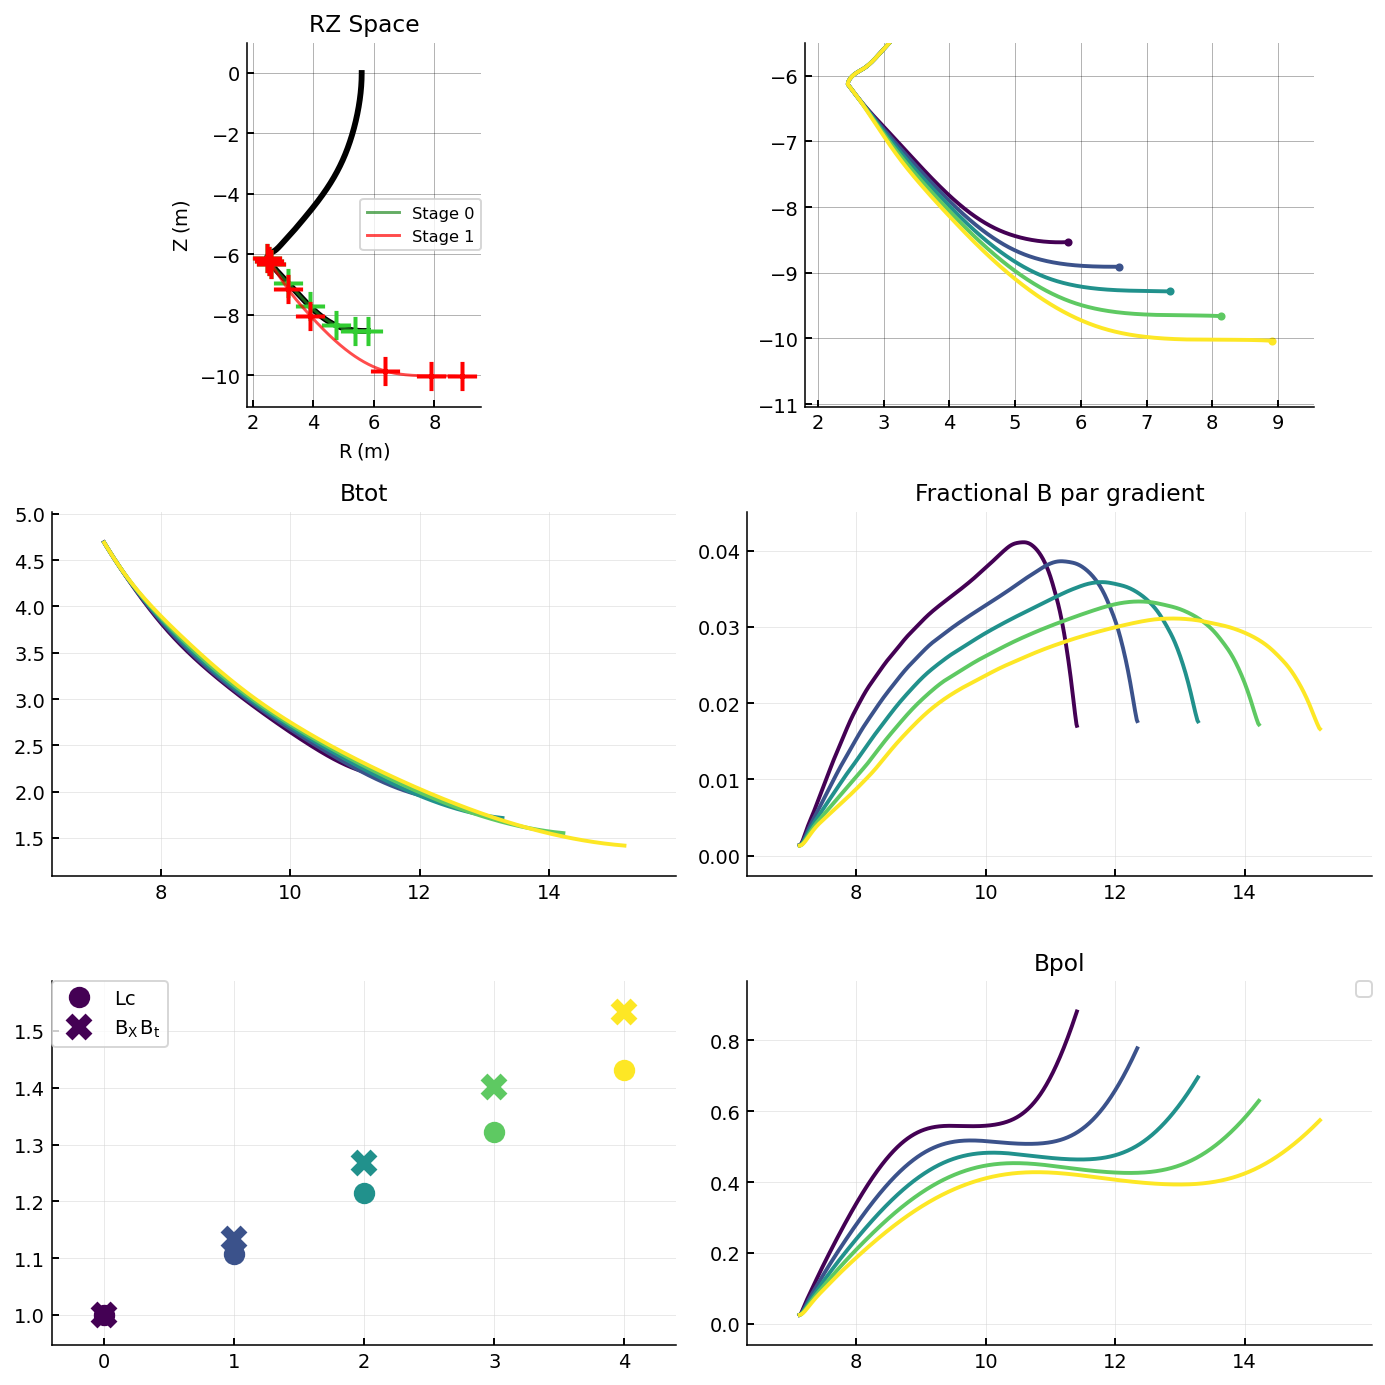

In [46]:
plt.close("all")
d = eqb["SPR45"]["ol"]
base = Profile(d["R"], d["Z"], d["Xpoint"], d["Btot"], d["Bpol"], d["S"], d["Spol"])
base_offsets = [
    {"pos" : 1},
    {"pos" : 0.97},
    {"pos" : 0.95},
    {"pos" : 0.75},
    {"pos" : 0.5},
    {"pos" : 0.25},
    {"pos" : 0.10},
    {"pos" : 0.0}]

offsets_stage1 = [
    {"pos" : 1,     "offsetx": 0, "offsety": 0},
    {"pos" : 0.97,  "offsetx": 0, "offsety": 0},
    {"pos" : 0.95,  "offsetx": 0, "offsety": 0},
    {"pos" : 0.75,  "offsetx": 0, "offsety": -0.2},
    {"pos" : 0.5,   "offsetx": 0, "offsety": -0.3},
    {"pos" : 0.25,  "offsetx": 1.6, "offsety": -1.5},
    {"pos" : 0.10,  "offsetx": 2.5, "offsety": -1.5},
    {"pos" : 0.0,   "offsetx": 3.1, "offsety": -1.5},
    ]


# Make stage 0 by copying the base profile
stage0 = base.copy()
stage0.offset_control_points(base_offsets)
stage0.name = "Stage 0"

# Make stage 1 by offsetting stage 0
stage1 = base.copy()
stage1.offset_control_points(offsets_stage1)
stage1.recalculate_topology()
stage1.name = "Stage 1"

profiles = {}
for i in np.linspace(0,1,5):
    profiles[i] = base.copy()
    profiles[i].offset_control_points(offsets_stage1, factor = i)
    profiles[i].recalculate_topology()
    profiles[i].name = i
    
plot_profiles(base, [stage0, stage1], profiles)

allprofiles["lower_farther_strike"] = copy.deepcopy(profiles)

# Run DLS

## Prepare

In [19]:
# results = dict()

#set switches
radios_default = {
    "ionisation": False,  # WIP - do not use. in development
    "upstreamGrid": True, # SET TRUE if including domain above xpoint. if true, source of divertor heat flux comes from radial transport upstream, and Tu is at the midplane. If false, heat flux simply enters at the x point as qi, and Tu is located at the x point. 
    "fluxlim": False,  # WIP - do not use. if true, turns on a flux limiter with coefficient alpha
}

#set general run parameters
constants_default = {
    "gamma_sheath": 7, #sheath transmittion coefficient for virtual target. Choice does not matter if Tt is low
    "Tt": 0.5, # requested virtual target temp for calculating heat flux at detachment front. Aim for low (sub 1eV) Tt
    
    "qpllu0": 1e9, # heat flux density at the x point
    "nu0" : 0.8e20, # Upstream density (if constant)
    "cz0" : 0.03, # Impurity fraction (if constant)
    
    "Lfunc": LfuncKallenbach("Ar"), # impurity cooling function. More are available in AnalyticCoolingCurves.py
    "alpha": 1000, # WIP - do not use. flux limiting alpha. Only matters if fluxlim is true
}


constants = constants_default.copy() # Set settings to default
radios = radios_default.copy() # Set settings to default
constants["qpllu0"] = 2e9

### Setup stores container

In [47]:
allstores = {}

## Run 1: farther strike point

In [48]:
cvar = "power"
design = "SPR45"
side = "ol"
study = "farther_strike"

allstores[study] = {}

for i in profiles:
    print(i)
    d = allprofiles[study][i].copy()
    SpolRange = np.linspace(0, d["Spol"][d["Xpoint"]], 25) # 
    SparRange = [d["S"][np.argmin(np.abs(d["Spol"] - SpolRange[x]))] for x, _ in enumerate(SpolRange)]

    try: 
        results = LRBv21(constants, radios, d, 
            SparRange, 
            verbosity = 0, control_variable = cvar, 
            Ctol = 1e-3, Ttol=1e-3,
            dynamicGrid = True,
            dynamicGridRefinementRatio = 10,
            zero_qpllt = True)
    
    except KeyboardInterrupt:
        print("Stopped")
        sys.exit(0)
    
    allstores[study][i] = copy.deepcopy(results)

0.0
Solving...0.00...0.48...1.00...1.59...2.24...2.96...3.71...4.52...5.34...6.20...7.09...8.03...8.98...9.96...10.99...12.12...13.31...14.68...16.19...18.05...20.25...23.08...27.14...33.53...51.99...Complete in 56.0 seconds
0.25
Solving...0.00...0.56...1.17...1.86...2.65...3.48...4.36...5.32...6.29...7.30...8.38...9.45...10.57...11.72...12.94...14.27...15.67...17.29...19.08...21.26...23.85...27.18...31.97...39.49...61.21...Complete in 73.4 seconds
0.5
Solving...0.00...0.65...1.36...2.15...3.05...4.01...5.06...6.13...7.28...8.45...9.66...10.91...12.20...13.53...14.93...16.47...18.08...19.94...22.01...24.53...27.53...31.37...36.89...45.56...70.61...Complete in 106.3 seconds
0.75
Solving...0.00...0.72...1.54...2.44...3.47...4.54...5.73...6.98...8.25...9.57...10.94...12.36...13.84...15.37...16.96...18.65...20.53...22.62...24.96...27.83...31.24...35.61...41.87...51.70...80.11...Complete in 111.1 seconds
1.0
Solving...0.00...0.81...1.71...2.74...3.88...5.08...6.41...7.80...9.21...10.73...12

## Lower strike point

In [49]:
cvar = "power"
design = "SPR45"
side = "ol"
study = "lower_strike"

allstores[study] = {}

for i in profiles:
    print(i)
    d = allprofiles[study][i].copy()
    SpolRange = np.linspace(0, d["Spol"][d["Xpoint"]], 20) # 
    SparRange = [d["S"][np.argmin(np.abs(d["Spol"] - SpolRange[x]))] for x, _ in enumerate(SpolRange)]

    try: 
        results = LRBv21(constants, radios, d, 
            SparRange, 
            verbosity = 0, control_variable = cvar, 
            Ctol = 1e-3, Ttol=1e-3,
            dynamicGrid = True,
            dynamicGridRefinementRatio = 10,
            zero_qpllt = True)
    
    except KeyboardInterrupt:
        print("Stopped")
        sys.exit(0)
    
    allstores[study][i] = copy.deepcopy(results)

0.0
Solving...0.00...0.61...1.30...2.11...2.99...3.96...5.00...6.06...7.20...8.37...9.58...10.88...12.30...13.88...15.68...17.92...20.82...24.79...31.51...51.99...Complete in 70.9 seconds
0.25
Solving...0.00...0.65...1.41...2.29...3.25...4.32...5.42...6.61...7.82...9.11...10.42...11.84...13.38...15.11...17.06...19.50...22.66...26.97...34.29...56.58...Complete in 72.5 seconds
0.5
Solving...0.00...0.71...1.54...2.49...3.55...4.69...5.90...7.19...8.53...9.93...11.39...12.89...14.58...16.46...18.60...21.27...24.71...29.41...37.39...61.68...Complete in 76.5 seconds
0.75
Solving...0.00...0.78...1.67...2.71...3.87...5.13...6.44...7.84...9.30...10.81...12.39...14.07...15.86...17.92...20.26...23.17...26.82...32.05...40.72...67.17...Complete in 79.0 seconds
1.0
Solving...0.00...0.85...1.83...2.94...4.19...5.55...7.01...8.49...10.10...11.73...13.45...15.27...17.27...19.46...22.07...25.18...29.15...34.84...44.24...72.96...Complete in 81.6 seconds


## Higher strike point

In [50]:
cvar = "power"
design = "SPR45"
side = "ol"
study = "higher_strike"

allstores[study] = {}

for i in profiles:
    print(i)
    d = allprofiles[study][i].copy()
    SpolRange = np.linspace(0, d["Spol"][d["Xpoint"]], 20) # 
    SparRange = [d["S"][np.argmin(np.abs(d["Spol"] - SpolRange[x]))] for x, _ in enumerate(SpolRange)]

    try: 
        results = LRBv21(constants, radios, d, 
            SparRange, 
            verbosity = 0, control_variable = cvar, 
            Ctol = 1e-3, Ttol=1e-3,
            dynamicGrid = True,
            dynamicGridRefinementRatio = 10,
            zero_qpllt = True)
    
    except KeyboardInterrupt:
        print("Stopped")
        sys.exit(0)
    
    allstores[study][i] = copy.deepcopy(results)

0.0
Solving...0.00...0.61...1.30...2.11...2.99...3.96...5.00...6.06...7.20...8.37...9.58...10.88...12.30...13.88...15.68...17.92...20.82...24.79...31.51...51.99...Complete in 69.4 seconds
0.25
Solving...0.00...0.56...1.20...1.95...2.77...3.68...4.64...5.63...6.69...7.77...8.92...10.13...11.42...12.89...14.61...16.66...19.36...23.05...29.29...48.32...Complete in 68.6 seconds
0.5
Solving...0.00...0.53...1.13...1.83...2.62...3.45...4.35...5.30...6.27...7.30...8.35...9.48...10.72...12.10...13.69...15.63...18.12...21.65...27.47...45.31...Complete in 72.8 seconds
0.75
Solving...0.00...0.50...1.07...1.74...2.49...3.30...4.14...5.05...5.97...6.95...7.97...9.05...10.22...11.54...13.06...14.95...17.31...20.68...26.19...43.18...Complete in 73.1 seconds
1.0
Solving...0.00...0.49...1.06...1.70...2.42...3.21...4.06...4.92...5.84...6.80...7.79...8.84...10.00...11.29...12.80...14.65...16.96...20.17...25.58...42.12...Complete in 52.7 seconds


## Poloidal flux expansion

In [51]:
cvar = "power"
design = "SPR45"
side = "ol"
study = "poloidal_flux_expansion"

allstores[study] = {}

for i in profiles:
    print(i)
    d = allprofiles[study][i].copy()
    SpolRange = np.linspace(0, d["Spol"][d["Xpoint"]], 20) # 
    SparRange = [d["S"][np.argmin(np.abs(d["Spol"] - SpolRange[x]))] for x, _ in enumerate(SpolRange)]

    try: 
        results = LRBv21(constants, radios, d, 
            SparRange, 
            verbosity = 0, control_variable = cvar, 
            Ctol = 1e-3, Ttol=1e-3,
            dynamicGrid = True,
            dynamicGridRefinementRatio = 10,
            zero_qpllt = True)
    
    except KeyboardInterrupt:
        print("Stopped")
        sys.exit(0)
    
    allstores[study][i] = copy.deepcopy(results)

0.0
Solving...0.00...0.61...1.30...2.11...2.99...3.96...5.00...6.06...7.20...8.37...9.58...10.88...12.30...13.88...15.68...17.92...20.82...24.79...31.51...51.99...Complete in 46.1 seconds
0.25
Solving...0.00...0.79...1.67...2.67...3.70...4.79...5.90...7.01...8.18...9.35...10.57...11.88...13.30...14.89...16.68...18.92...21.82...25.79...32.51...52.99...Complete in 57.7 seconds
0.5
Solving...0.00...1.14...2.37...3.67...4.91...6.14...7.33...8.49...9.69...10.88...12.10...13.42...14.84...16.42...18.22...20.46...23.36...27.33...34.05...54.53...Complete in 71.4 seconds
0.75
Solving...0.00...2.06...4.08...5.93...7.50...8.91...10.21...11.42...12.65...13.85...15.08...16.40...17.82...19.41...21.21...23.45...26.35...30.32...37.04...57.52...Complete in 74.5 seconds
1.0
Solving...0.00...10.69...16.52...19.83...21.96...23.62...25.04...26.31...27.57...28.79...30.03...31.35...32.77...34.36...36.16...38.40...41.30...45.27...51.99...72.47...Complete in 62.1 seconds


## Poloidal flux expansion (middle)

In [52]:
cvar = "power"
design = "SPR45"
side = "ol"
study = "poloidal_flux_expansion_middle"

allstores[study] = {}

for i in profiles:
    print(i)
    d = allprofiles[study][i].copy()
    SpolRange = np.linspace(0, d["Spol"][d["Xpoint"]], 20) # 
    SparRange = [d["S"][np.argmin(np.abs(d["Spol"] - SpolRange[x]))] for x, _ in enumerate(SpolRange)]

    try: 
        results = LRBv21(constants, radios, d, 
            SparRange, 
            verbosity = 0, control_variable = cvar, 
            Ctol = 1e-3, Ttol=1e-3,
            dynamicGrid = True,
            dynamicGridRefinementRatio = 10,
            zero_qpllt = True)
    
    except KeyboardInterrupt:
        print("Stopped")
        sys.exit(0)
    
    allstores[study][i] = copy.deepcopy(results)

0.0
Solving...0.00...0.61...1.30...2.11...2.99...3.96...5.00...6.06...7.20...8.37...9.58...10.88...12.30...13.88...15.68...17.92...20.82...24.79...31.51...51.99...Complete in 45.7 seconds
0.25
Solving...0.00...0.61...1.30...2.11...3.00...4.01...5.12...6.33...7.72...9.19...10.71...12.28...13.87...15.56...17.41...19.68...22.59...26.57...33.29...53.78...Complete in 45.7 seconds
0.5
Solving...0.00...0.61...1.30...2.11...3.01...4.05...5.25...6.67...8.44...10.44...12.49...14.44...16.27...18.08...19.99...22.29...25.21...29.19...35.92...56.40...Complete in 46.3 seconds
0.75
Solving...0.00...0.61...1.30...2.12...3.03...4.10...5.41...7.10...9.56...12.70...15.83...18.44...20.57...22.52...24.50...26.82...29.76...33.75...40.47...60.97...Complete in 46.7 seconds
1.0
Solving...0.00...0.61...1.30...2.12...3.04...4.16...5.59...7.71...11.79...19.08...25.83...29.78...32.35...34.48...36.52...38.88...41.83...45.82...52.55...73.04...Complete in 49.2 seconds


## Lower farther strike point

In [53]:
cvar = "power"
design = "SPR45"
side = "ol"
study = "lower_farther_strike"

allstores[study] = {}

for i in profiles:
    print(i)
    d = allprofiles[study][i].copy()
    SpolRange = np.linspace(0, d["Spol"][d["Xpoint"]], 20) # 
    SparRange = [d["S"][np.argmin(np.abs(d["Spol"] - SpolRange[x]))] for x, _ in enumerate(SpolRange)]

    try: 
        results = LRBv21(constants, radios, d, 
            SparRange, 
            verbosity = 0, control_variable = cvar, 
            Ctol = 1e-3, Ttol=1e-3,
            dynamicGrid = True,
            dynamicGridRefinementRatio = 10,
            zero_qpllt = True)
    
    except KeyboardInterrupt:
        print("Stopped")
        sys.exit(0)
    
    allstores[study][i] = copy.deepcopy(results)

0.0
Solving...0.00...0.61...1.30...2.11...2.99...3.96...5.00...6.06...7.20...8.37...9.58...10.88...12.30...13.88...15.68...17.92...20.82...24.79...31.51...51.99...Complete in 45.1 seconds
0.25
Solving...0.00...0.73...1.60...2.56...3.64...4.82...6.07...7.39...8.78...10.20...11.69...13.26...14.95...16.88...19.11...21.82...25.34...30.17...38.35...63.26...Complete in 49.6 seconds
0.5
Solving...0.00...0.86...1.88...3.02...4.29...5.69...7.15...8.74...10.32...12.03...13.80...15.62...17.65...19.93...22.57...25.77...29.90...35.59...45.24...74.60...Complete in 55.6 seconds
0.75
Solving...0.00...0.99...2.16...3.48...4.95...6.56...8.25...10.06...11.93...13.84...15.87...18.03...20.39...22.99...25.96...29.63...34.35...41.03...52.15...85.97...Complete in 59.9 seconds
1.0
Solving...0.00...1.12...2.45...3.94...5.60...7.43...9.34...11.39...13.49...15.71...18.00...20.46...23.07...26.04...29.43...33.60...38.94...46.50...59.08...97.37...Complete in 63.3 seconds


# Read/write

In [54]:
write_file(allstores, "2024-03-14 - Outer examples for ppt.pkl")

2024-03-14 - Outer examples for ppt.pkl written


In [20]:
allstores = read_file("2024-03-14 - Outer examples for ppt.pkl")

2024-03-14 - Outer examples for ppt.pkl loaded


# Postprocess designs

In [103]:
allprofiles.keys()

dict_keys(['farther_strike', 'lower_strike', 'higher_strike', 'poloidal_flux_expansion', 'lower_farther_strike'])

C:\Users\mikek\AppData\Local\Temp\ipykernel_36036\3223691059.py:1: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = mpl.cm.get_cmap('viridis', 5)


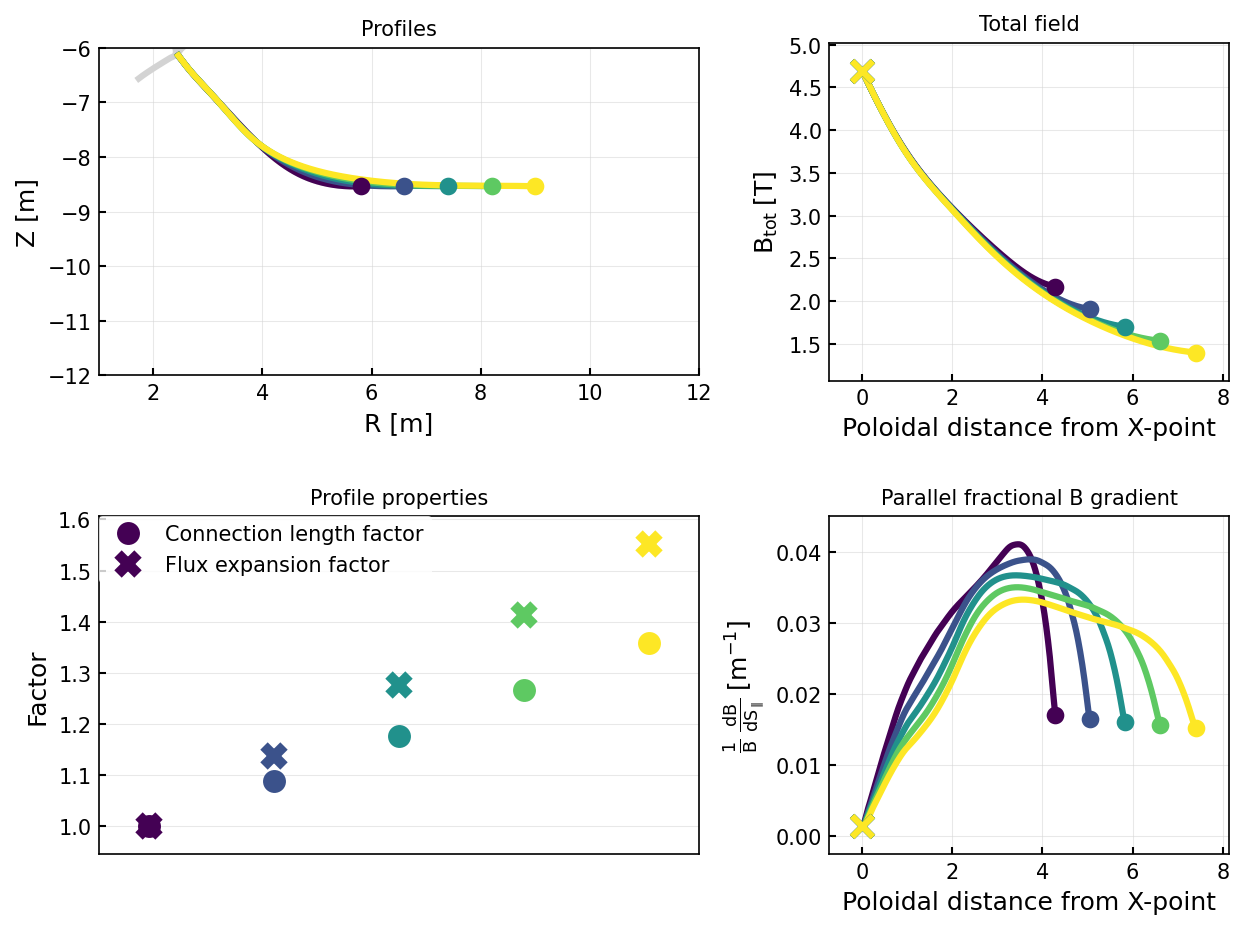

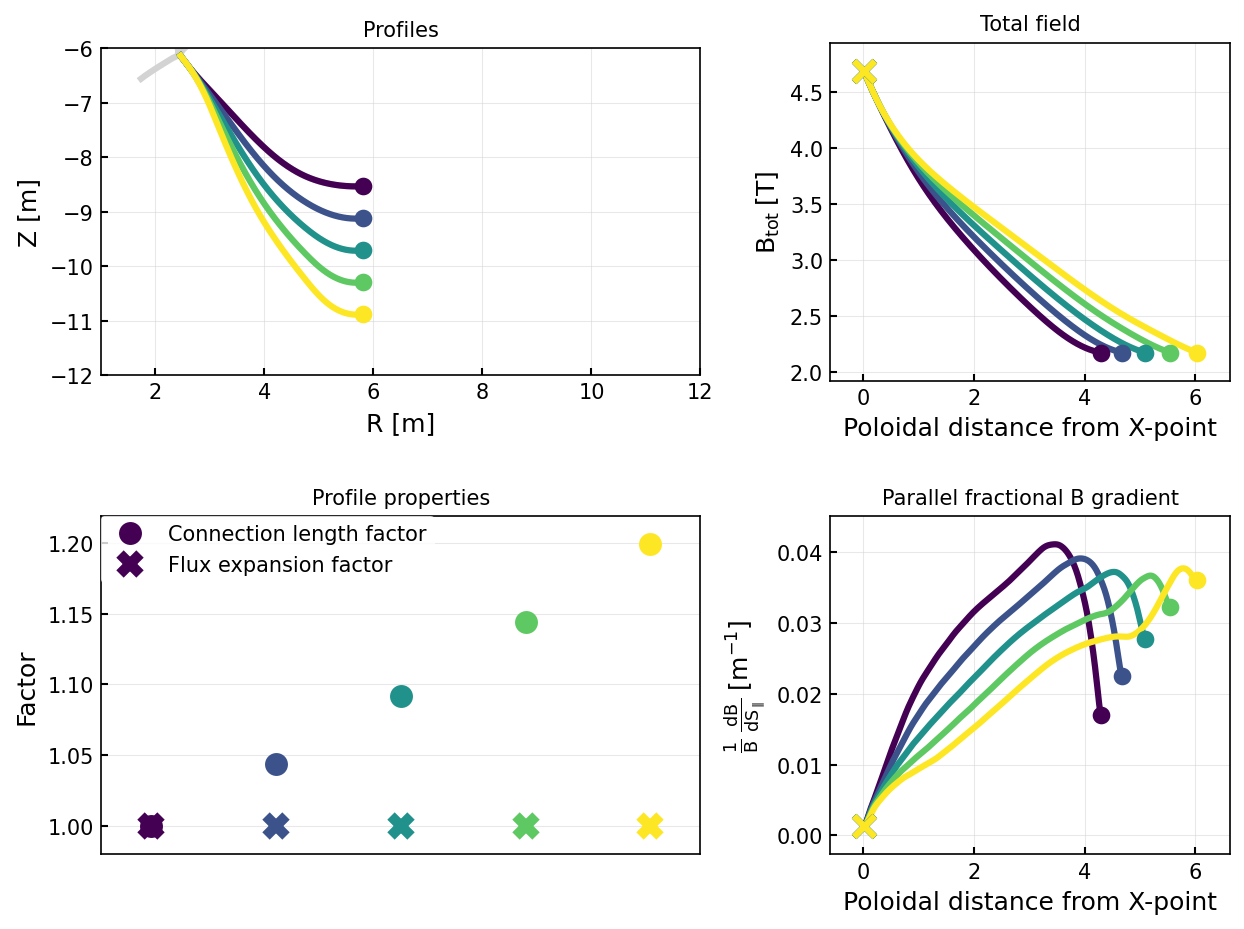

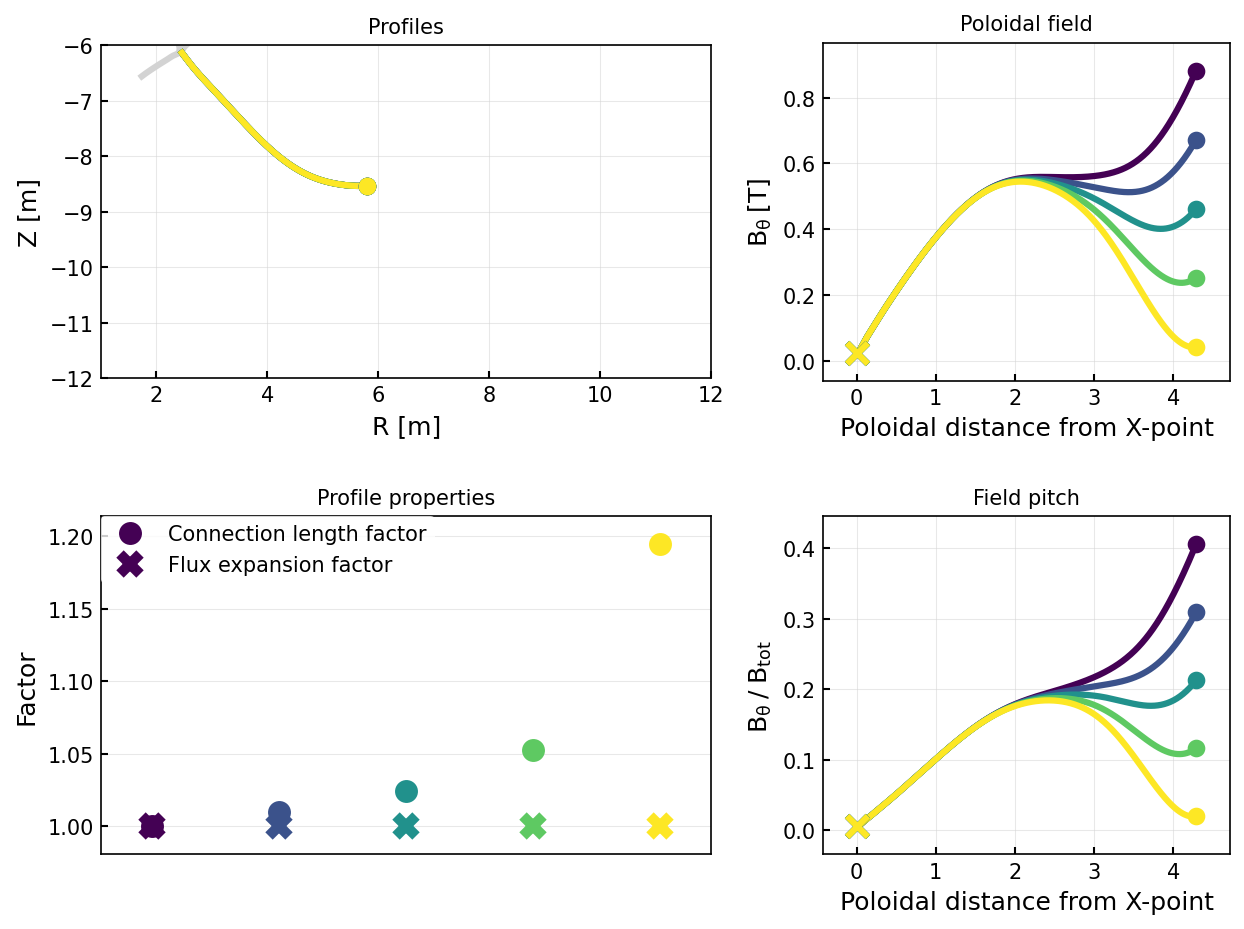

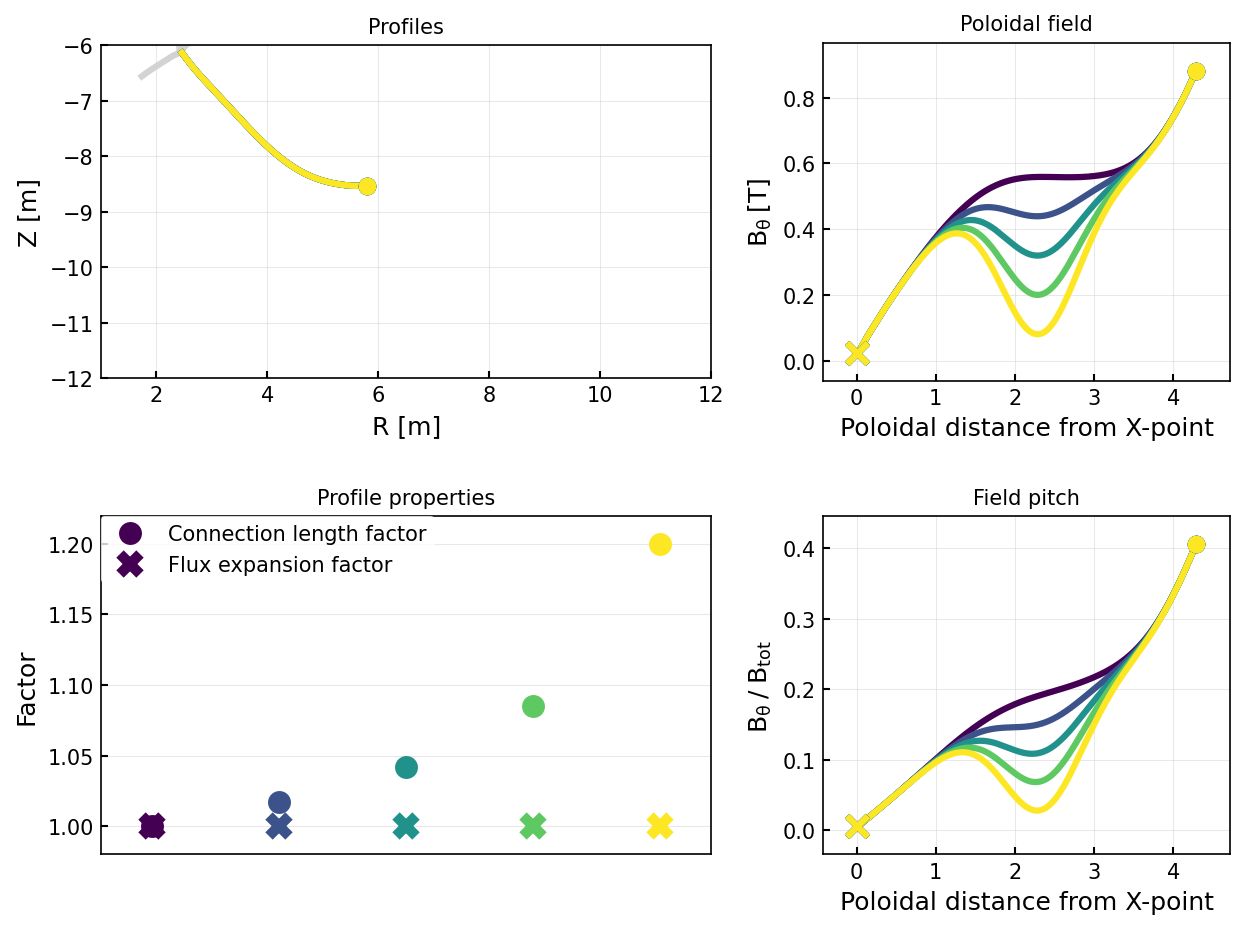

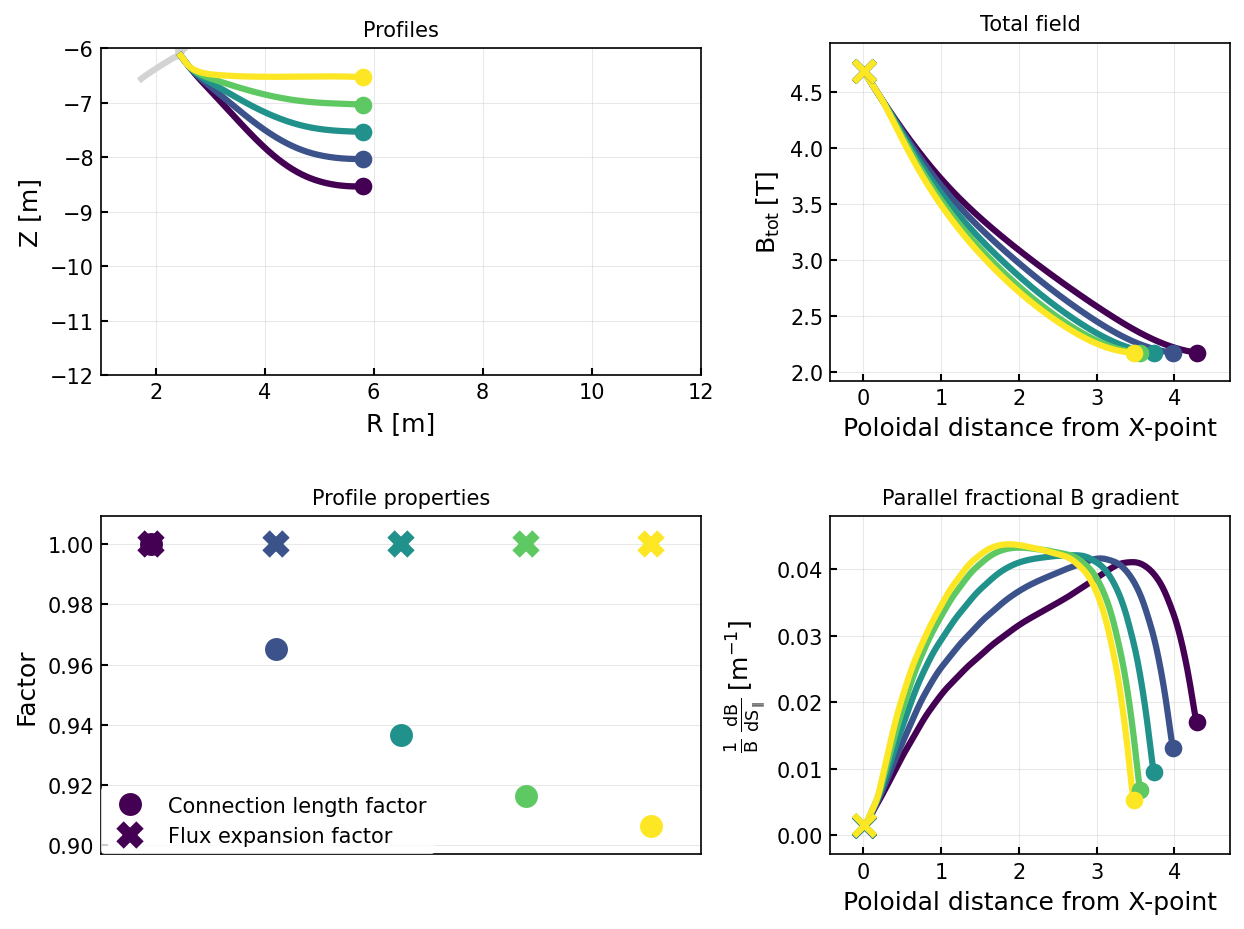

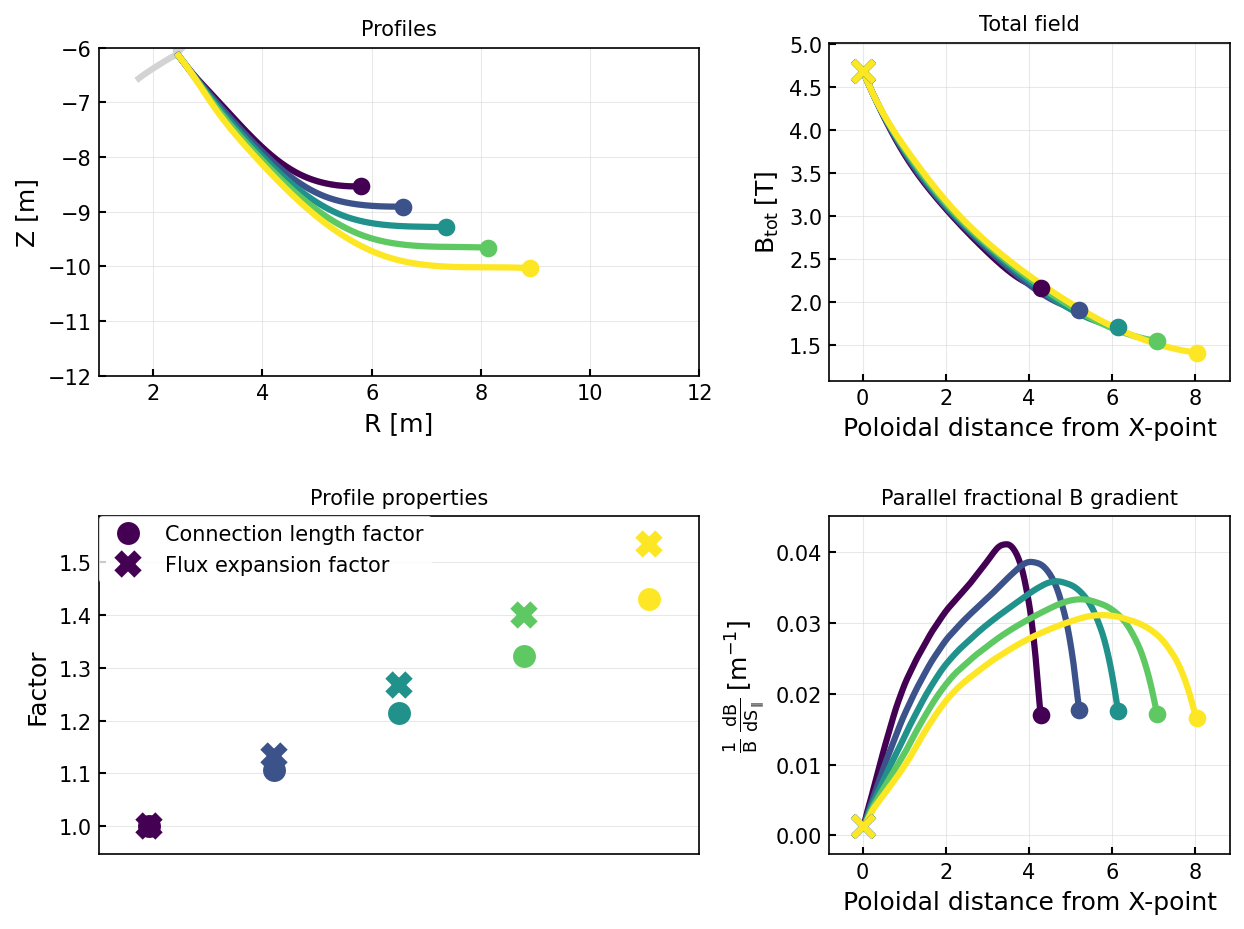

In [60]:
cmap = mpl.cm.get_cmap('viridis', 5)
colors = [cmap(x) for x in np.linspace(0,1, 5)]

xlims = (1,12)
ylims = (-12,-6)
plot_all = False

plotter = {}
plotter["farther_strike"] = plotProfiles(allprofiles["farther_strike"], basis = "Spol", side = "outer", colors = colors)
plotter["farther_strike"].gridplot(["Btot", "Btotgrad"], eqb["SPR45"], designs_ylims = ylims, designs_xlims = xlims, plot_all = plot_all)

plotter["lower_strike"] = plotProfiles(allprofiles["lower_strike"], basis = "Spol", side = "outer", colors = colors)
plotter["lower_strike"].gridplot(["Btot", "Btotgrad"], eqb["SPR45"], designs_ylims = ylims, designs_xlims = xlims, plot_all = plot_all)

plotter["poloidal_flux_expansion"] = plotProfiles(allprofiles["poloidal_flux_expansion"], basis = "Spol", side = "outer", colors = colors)
plotter["poloidal_flux_expansion"].gridplot(["Bpol", "Bpitch"], eqb["SPR45"],designs_ylims = ylims, designs_xlims = xlims, plot_all = plot_all)

plotter["poloidal_flux_expansion_middle"] = plotProfiles(allprofiles["poloidal_flux_expansion_middle"], basis = "Spol", side = "outer", colors = colors)
plotter["poloidal_flux_expansion_middle"].gridplot(["Bpol", "Bpitch"], eqb["SPR45"],designs_ylims = ylims, designs_xlims = xlims, plot_all = plot_all)

plotter["higher_strike"] = plotProfiles(allprofiles["higher_strike"], basis = "Spol", side = "outer", colors = colors)
plotter["higher_strike"].gridplot(["Btot", "Btotgrad"], eqb["SPR45"], designs_ylims = ylims, designs_xlims = xlims, plot_all = plot_all)

plotter["lower_farther_strike"] = plotProfiles(allprofiles["lower_farther_strike"], basis = "Spol", side = "outer", colors = colors)
plotter["lower_farther_strike"].gridplot(["Btot", "Btotgrad"], eqb["SPR45"],designs_ylims = ylims, designs_xlims = xlims,  plot_all = plot_all)



# Postprocess results

In [34]:
print("Threshold/window improvements")
for study in allstores:
    stores = allstores[study]
    
    thresh = []
    for key in stores:
        s = stores[key]
        thresh.append(s["cvar"][0])
        
    improvement = thresh[-1] / thresh[0]
    
    print(f"{study}: {improvement:.2f}")

Threshold/window improvements
farther_strike: 2.27
lower_strike: 1.21
poloidal_flux_expansion: 1.33
lower_farther_strike: 2.35
poloidal_flux_expansion_middle: 1.24


In [33]:
print("BxBt/Lc improvements")
for study in allprofiles:
    profiles = allprofiles[study]
    
    Lc = []
    BxBt = []
    
    keys = list(profiles.keys())
    
    Lc = profiles[keys[-1]].get_connection_length() / profiles[keys[0]].get_connection_length()
    BxBt = profiles[keys[-1]].get_total_flux_expansion() / profiles[keys[0]].get_total_flux_expansion()
    
    # for key in profiles:
    #     s = stores[key]
    #     thresh.append(s["cvar"][0])
        
    # improvement = thresh[-1] / thresh[0]
    
    print(f"{study}: \n  Lc = {Lc:.2f} \n  Bx/Bt = {BxBt:.2f}\n")

BxBt/Lc improvements
farther_strike: 
  Lc = 1.36 
  Bx/Bt = 1.55

lower_strike: 
  Lc = 1.20 
  Bx/Bt = 1.00

higher_strike: 
  Lc = 0.91 
  Bx/Bt = 1.00

poloidal_flux_expansion_middle: 
  Lc = 1.20 
  Bx/Bt = 1.00

lower_farther_strike: 
  Lc = 1.43 
  Bx/Bt = 1.53

poloidal_flux_expansion: 
  Lc = 1.19 
  Bx/Bt = 1.00



In [61]:
profiles[keys[0]].get_total_flux_expansion()

2.1638425997505637

In [38]:
allstores.keys()

dict_keys(['farther_strike', 'lower_strike', 'lower_farther_strike', 'poloidal_flux_expansion'])

C:\Users\mikek\AppData\Local\Temp\ipykernel_36036\3702310663.py:1: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = mpl.cm.get_cmap('viridis', 5)


farther_strike
lower_strike
poloidal_flux_expansion
lower_farther_strike
poloidal_flux_expansion_middle


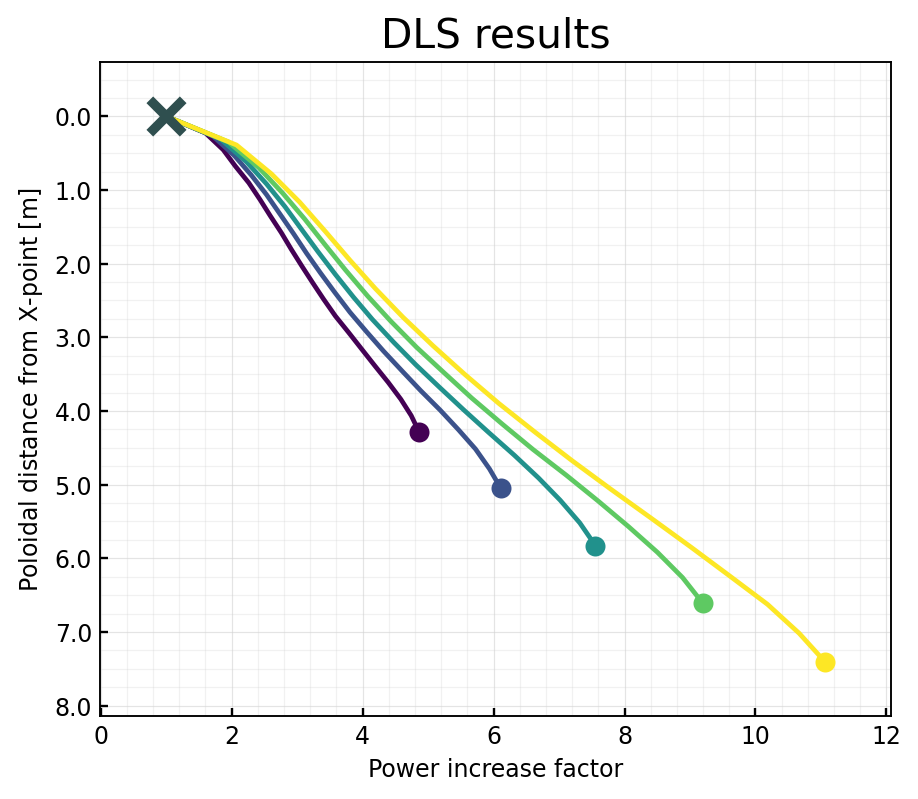

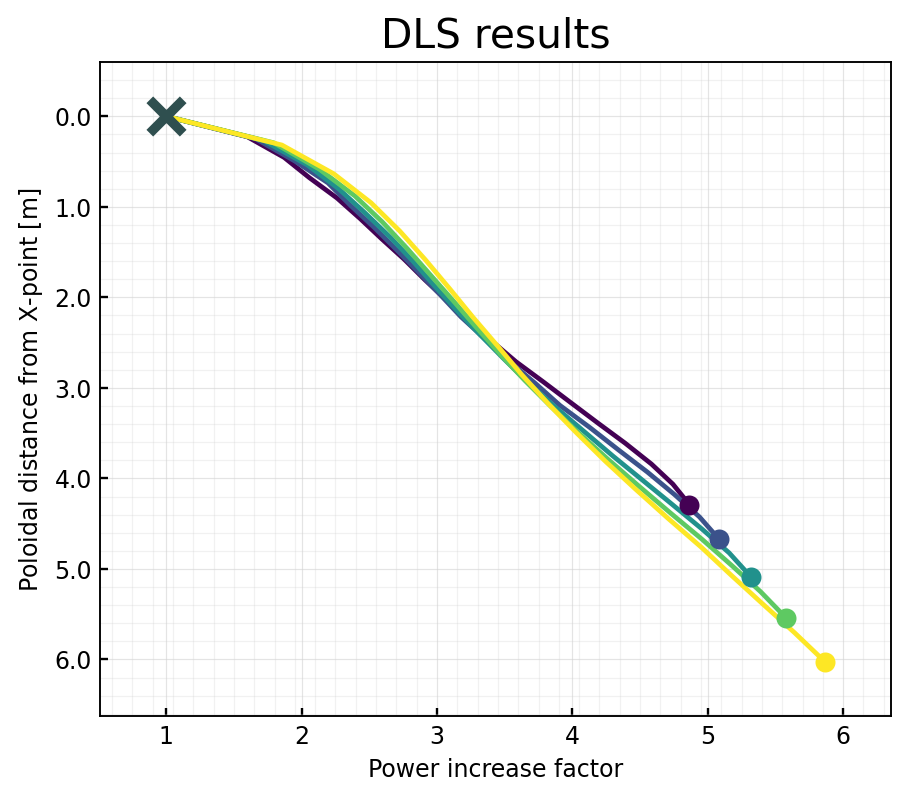

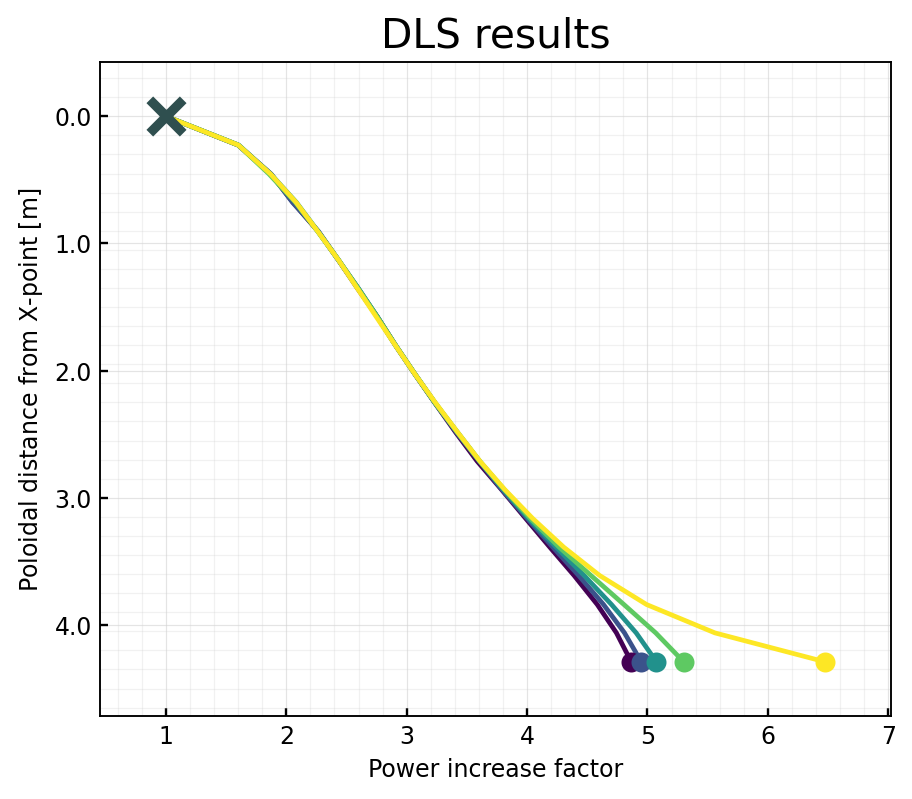

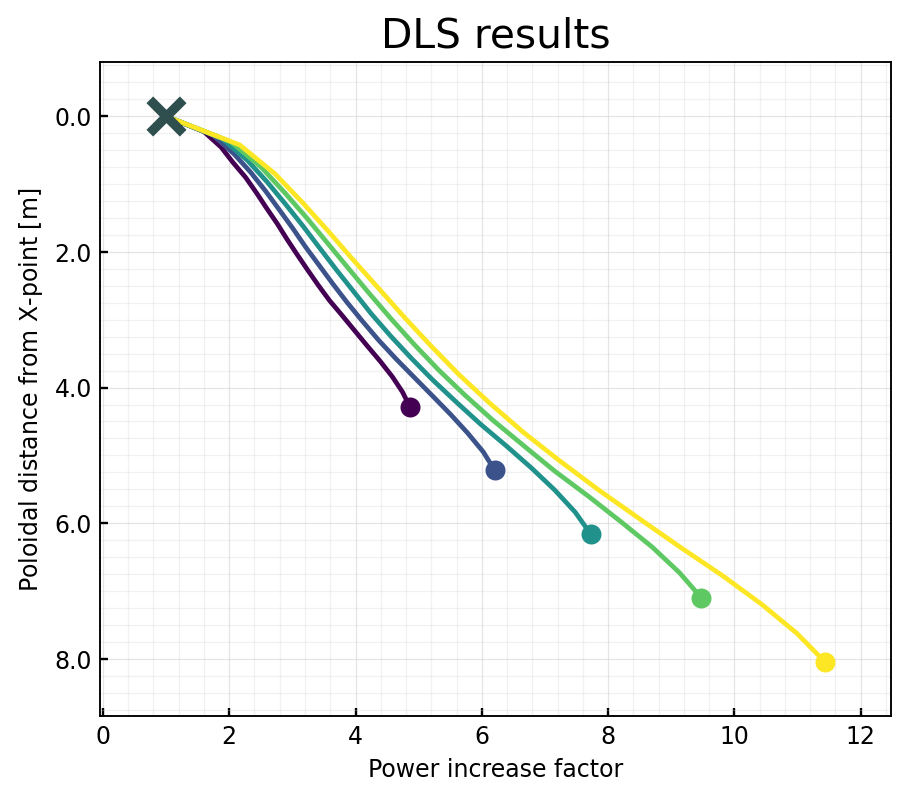

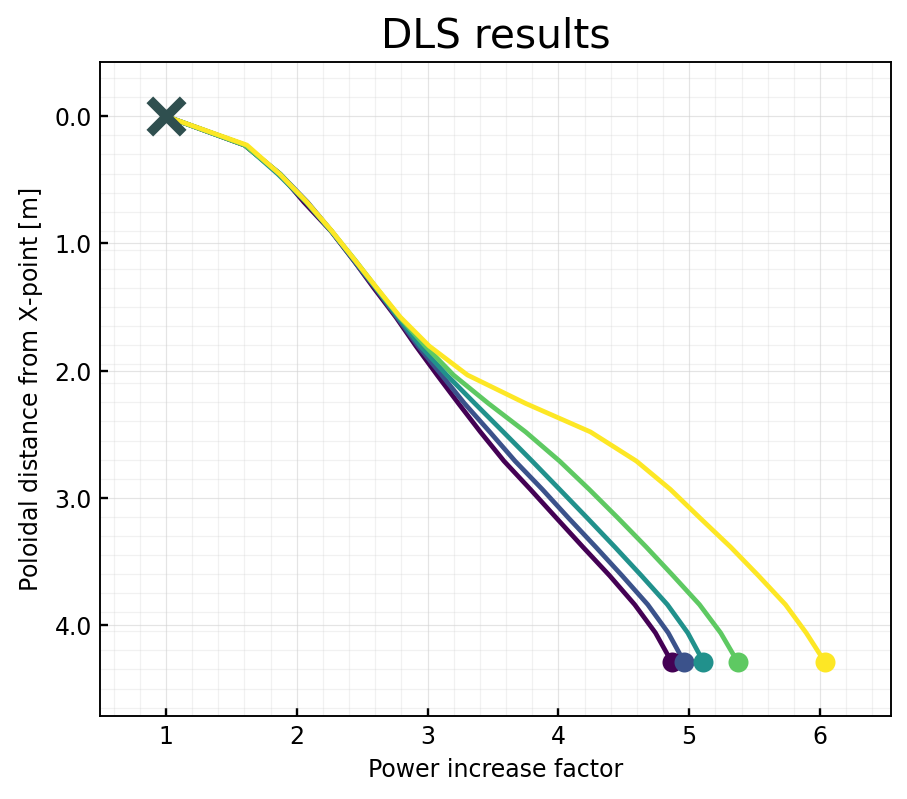

In [39]:

cmap = mpl.cm.get_cmap('viridis', 5)
colors = [cmap(x) for x in np.linspace(0,1, len(profiles))]

for key in allstores:
    stores = allstores[key]
    print(key)
    plot_results(stores, mode = "outer", colors = colors)

In [258]:
s.keys()

dict_keys(['Splot', 'SpolPlot', 'cvar', 'Sprofiles', 'Tprofiles', 'Rprofiles', 'Qprofiles', 'Spolprofiles', 'Btotprofiles', 'Bpolprofiles', 'Xpoints', 'logs'])

In [298]:
key = 1
s  = store_farther_strike[key]
p = profiles_farther_strike[key]
i = 0

Spol = s["Spolprofiles"][i]
S = s["Sprofiles"][i]
Btot = s["Btotprofiles"][i]
Bpol = s["Bpolprofiles"][i]
Xpoint = s["Xpoints"][i]

T = s["Tprofiles"][i]
q = s["Qprofiles"][i]
P = T[-1] * s["state"].nu
N = P/T
R = s["Rprofiles"][i]   # W/m3

st = s["state"]
cvar = s["cvar"][i]
st.qradial

qr_calc = q[Xpoint] / Btot[Xpoint] / np.trapz(1/Btot[Xpoint:], x = S[Xpoint:])
qr_calc = cvar / Btot[Xpoint] / np.trapz(1/Btot[Xpoint:], x = S[Xpoint:])

print(f"qpar at xpoint:  {q[Xpoint]:.2e} W/m2")
print(f"cvar:            {cvar:.2e} W/m2")
print(f"qradial in code: {st.qradial:.2e} W/m2")
print(f"qradial in calc: {qr_calc:.2e} W/m2")

qpar at xpoint:  1.04e+09 W/m2
cvar:            1.33e+09 W/m2
qradial in code: 2.01e+07 W/m2
qradial in calc: 2.01e+07 W/m2


In [215]:
s["cvar"]

array([6.44958938e+09, 2.56543284e+09, 1.44107307e+09, 9.27044032e+08,
       6.04967038e+08])

C:\Users\mikek\AppData\Local\Temp\ipykernel_32280\3979861533.py:10: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = [plt.cm.get_cmap("viridis", len(s["Spolprofiles"]))(x) for x in range(len(s["Spolprofiles"]))]


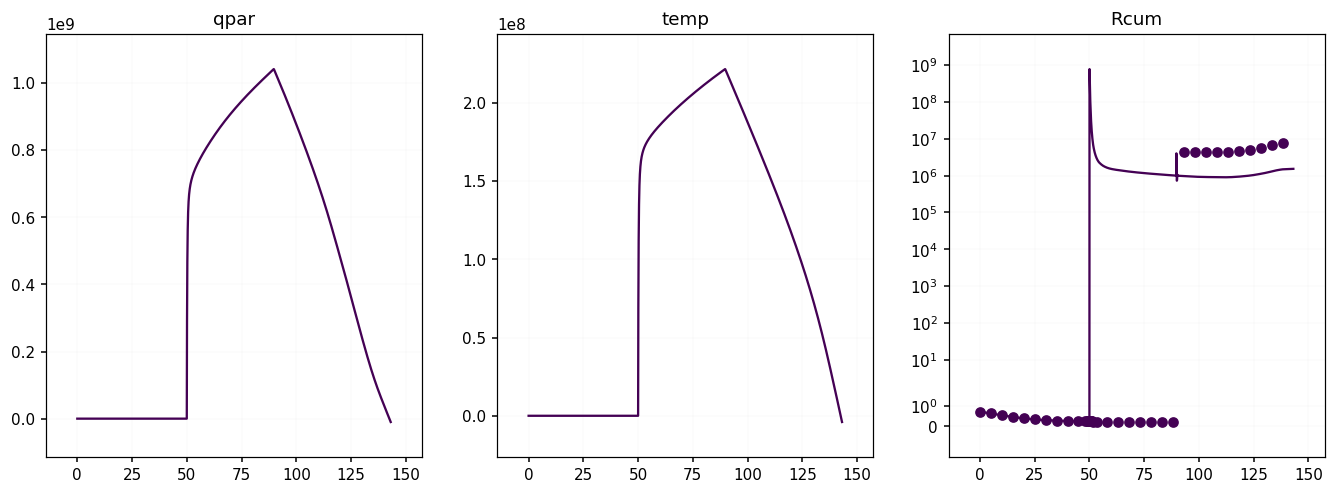

In [299]:
key = 1
s  = store_farther_strike[key]
p = profiles_farther_strike[key]

i = -1


fig, axes = plt.subplots(1,3,figsize=(15,5))

colors = [plt.cm.get_cmap("viridis", len(s["Spolprofiles"]))(x) for x in range(len(s["Spolprofiles"]))]

for i, _ in enumerate(s["Spolprofiles"]):
    i=0
    Spol = s["Spolprofiles"][i]
    S = s["Sprofiles"][i]
    Btot = s["Btotprofiles"][i]
    Bpol = s["Bpolprofiles"][i]
    Xpoint = s["Xpoints"][i]
    
    T = s["Tprofiles"][i]
    q = s["Qprofiles"][i]
    P = T[-1] * s["state"].nu
    N = P/T
    R = s["Rprofiles"][i]   # W/m3
    
    Rcum = sp.integrate.cumulative_trapezoid(y = R, x = S, initial = 0)
    Rcum /= Rcum.max()
    
    Prad = np.gradient(q/Btot, S)   
            
    if s["radios"]["upstreamGrid"] is True:
        # qradial is the uniform upstream heat source
        qradial = np.ones_like(S)
        qradial[Xpoint:] = s["state"].qradial
        Prad += qradial/Btot 
    
    Pradcum = sp.integrate.cumulative_trapezoid(y = Prad, x = S, initial = 0)
    Pradcum /= np.nanmax(Pradcum)

    ax = axes[0]
    ax.plot(S, q, color = colors[i])
    ax.set_title("qpar")
    
    ax = axes[1]
    # ax.plot(S, T, color = colors[i])
    ax.plot(S, q/Btot, color = colors[i])
    ax.set_title("temp")
    
    ax = axes[2]
    ax.plot(S, Prad, color = colors[i])
    ax.plot(S[::50], qradial[::50]/Btot[::50], marker = "o", lw = 0, color = colors[i])
    # ax2 = ax.twinx()
    # ax2.plot(S, np.gradient(Rcum,S), color = colors[i], alpha = 0.3)
    ax.set_yscale("symlog")
    ax.set_title("Rcum")

# Convergence analysis

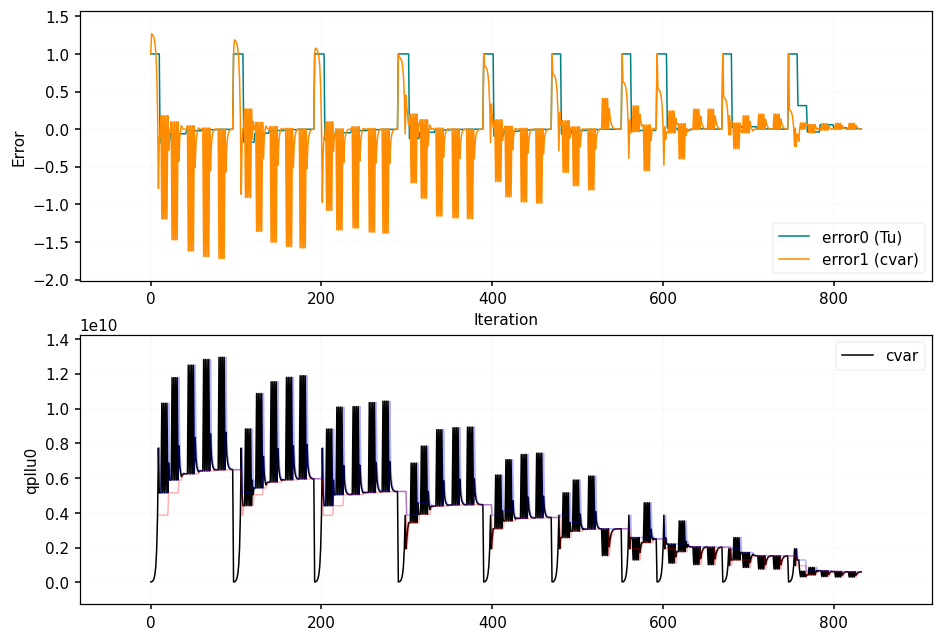

In [464]:


i = 1
logs = store_farther_strike[i]["logs"]
Svars = list(logs.keys())
log = logs[Svars[0]]

error0 = np.array(log["error0"])
error1 = np.array(log["error1"])

if np.max(error1) > 1e2:
    error1[error1 > np.median(error1)*3] = np.nan

fig, axes = plt.subplots(2,1, figsize = (10,7))
ax = axes[0]
ax.plot(log["error0"], lw = 1,  label = "error0 (Tu)")
ax.plot(error1, lw = 1,  label = "error1 (cvar)")
ax.legend()
ax.set_xlabel("Iteration")
ax.set_ylabel("Error")

ax = axes[1]
ax.plot(1/np.array(log["cvar"]), color = "k", lw = 1, label = "cvar")
ax.plot(1/np.array(log["upper_bound"]), color = "red", ls = "-", alpha = 0.3, lw = 1)
ax.plot(1/np.array(log["lower_bound"]), color = "blue", ls = "-", alpha = 0.3, lw = 1)
ax.set_ylabel("qpllu0")
ax.legend()


In [ ]:
stores = store_farther_strike
profiles = profiles_farther_strike
for key in stores:
    p = profiles[key]
    s = stores[key]
    plot_profile_histories(p, s, [0,1,2,4], rad_threshold = 0.7, mode = "rad", title = f"Flux expansion = {key}")

# Main results

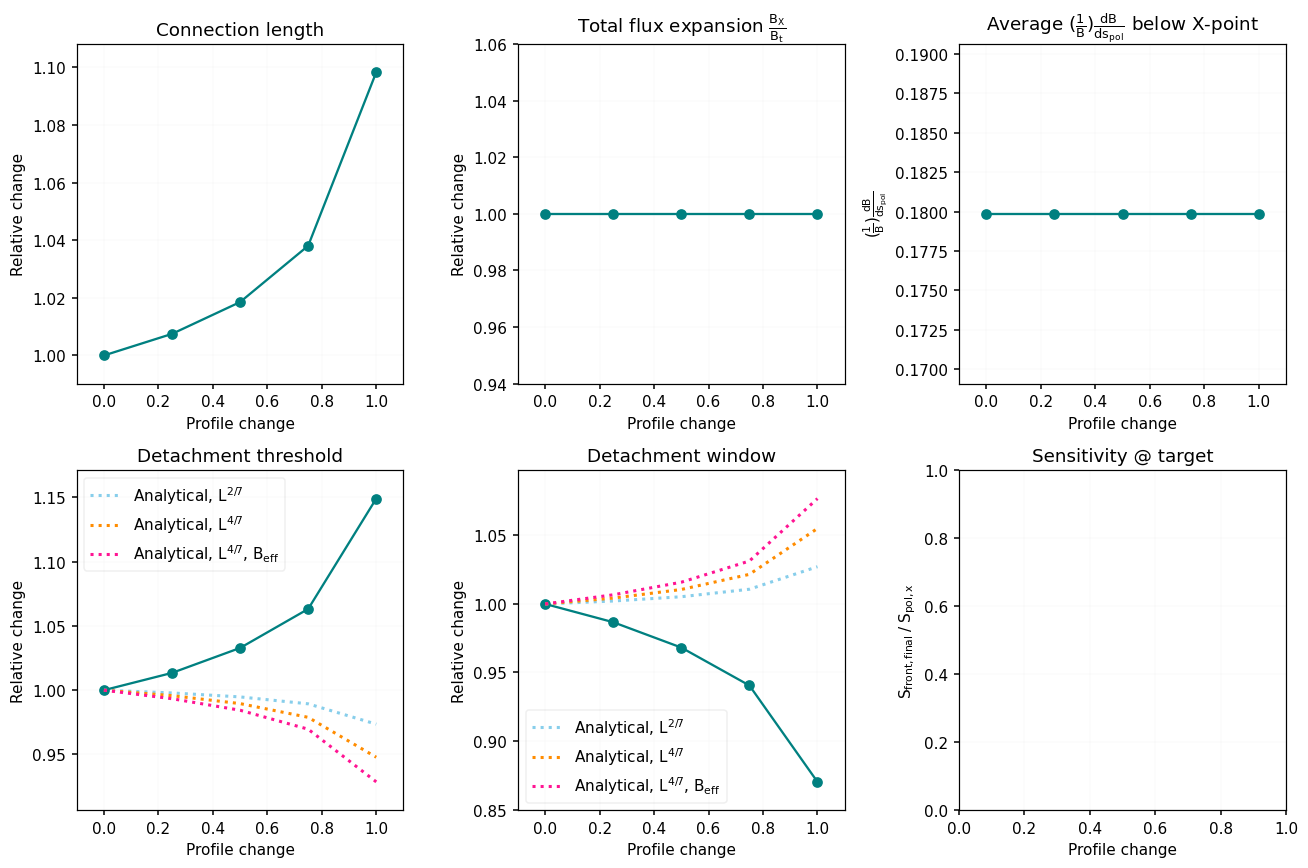

In [454]:
study = "poloidal_flux_expansion"
store = allstores[study]
profile = allprofiles[study]

labels = ["Height", "Height and distance"]
colors = ["teal", "darkorange"]

windows = []

fig, axes = plt.subplots(2,3, dpi = 110, figsize = (12,8))

windows = np.array([store[x]["window_ratio"] for x in profiles])

thresholds = np.array([store[x]["threshold"] for x in profiles])
L = np.array([profiles[x].get_connection_length() for x in profiles])
BxBt = np.array([profiles[x].get_total_flux_expansion() for x in profiles])
frac_gradB = np.array([profiles[x].get_average_frac_gradB() for x in profiles])
avgB_ratio = np.array([profiles[x].get_average_B_ratio() for x in profiles])
front_dfs = [get_front_widths(profiles[x], store[x], Rcutoff = 0.9) for x in profiles]
BxBt_eff = [df["Btot_eff"].iloc[-1] / df["Btot_eff"].iloc[0] for df in front_dfs]

avgB_ratio_eff = []
for df in front_dfs:
    newS = np.linspace(df["Spar"].iloc[0], df["Spar"].iloc[-1], 100)
    Btot_eff_interp = sp.interpolate.make_interp_spline(df["Spar"], df["Btot_eff"])(newS)
    avgB_ratio_eff.append(df["Btot"].iloc[-1] / np.mean(Btot_eff_interp))

# target_sens = np.array([get_sensitivity(store[x]["crel_trim"], store[x]["SpolPlot"], fluctuation=1.05, location=0.0) for x in profiles])

L_base = L[0]
BxBt_base = BxBt[0]
threshold_base = thresholds[0]
window_base = windows[0]
avgB_ratio_base = avgB_ratio[0]
    
threshcalc = (BxBt/BxBt_base)**(-1) * (L/L_base)**(-2/7) * (avgB_ratio/avgB_ratio_base)**(2/7)
threshcalc2 = (BxBt/BxBt_base)**(-1) * (L/L_base)**(-4/7) * (avgB_ratio/avgB_ratio_base)**(2/7)
threshcalc3 = (BxBt_eff/BxBt_eff[0])**(-1) * (L/L_base)**(-4/7) * (avgB_ratio_eff/avgB_ratio_eff[0])**(2/7)

windowcalc = (BxBt/BxBt_base)**(1) * (L/L_base)**(2/7) * (avgB_ratio/avgB_ratio_base)**(-2/7)
windowcalc2 = (BxBt/BxBt_base)**(1) * (L/L_base)**(4/7) * (avgB_ratio/avgB_ratio_base)**(-2/7)
windowcalc3 = (BxBt_eff/BxBt_eff[0])**(1) * (L/L_base)**(4/7) * (avgB_ratio_eff/avgB_ratio_eff[0])**(-2/7)

index = profiles.keys()

# index = np.linspace(0,1,5)+i
axes[0,0].set_title("Connection length")
axes[0,0].plot(index, L/L_base, marker = "o")

axes[0,1].set_title(r"Total flux expansion $\frac{B_{X}}{B_{t}}$")
axes[0,1].plot(index, BxBt/BxBt_base, marker = "o")

axes[0,2].set_title(r"Average $(\frac{1}{B}) \frac{dB}{ds_{pol}}$ below X-point")
axes[0,2].plot(index, frac_gradB, marker = "o")

axes[1,0].set_title(r"Detachment threshold")
axes[1,0].plot(index, thresholds/threshold_base, marker = "o")

lw = 2
axes[1,0].plot(index, threshcalc, lw = lw, color = "skyblue", ls = ":", label = None if i == 0 else "Analytical, $L^{2/7}$")
axes[1,0].plot(index, threshcalc2, lw = lw, color = "darkorange", ls = ":", label = None if i == 0 else "Analytical, $L^{4/7}$")
axes[1,0].plot(index, threshcalc3, lw = lw, color = "deeppink", ls = ":", label = None if i == 0 else "Analytical, $L^{4/7}$, $B_{eff}$")
axes[1,0].legend(fontsize = "medium")

axes[1,1].set_title(r"Detachment window")
axes[1,1].plot(index, windows/window_base, marker = "o")
axes[1,1].plot(index, windowcalc, lw = lw, color = "skyblue", ls = ":", label = None if i == 0 else "Analytical, $L^{2/7}$")
axes[1,1].plot(index, windowcalc2, lw = lw, color = "darkorange", ls = ":", label = None if i == 0 else "Analytical, $L^{4/7}$")
axes[1,1].plot(index, windowcalc3, lw = lw, color = "deeppink", ls = ":", label = None if i == 0 else "Analytical, $L^{4/7}$, $B_{eff}$")
axes[1,1].legend(fontsize = "medium")

axes[1,2].set_title(r"Sensitivity @ target")
# axes[1,2].plot(index, target_sens, marker = "o")

for ax in axes.flatten():
    ax.set_xlabel("Profile change")

for ax in [axes[0,0], axes[0,1], axes[1,0], axes[1,1]]:
    ax.set_ylabel("Relative change")
    
axes[0,2].set_ylabel(r"$(\frac{1}{B}) \frac{dB}{ds_{pol}}$")
axes[1,2].set_ylabel("$S_{front, final} \ /\  S_{pol, x}$")
fig.tight_layout()

# Capturing impact of gradient

C:\Users\mikek\AppData\Local\Temp\ipykernel_58272\1119466691.py:1: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  [plt.cm.get_cmap("viridis", 5)(x) for x in range(5)]


Text(0.5, 1.0, 'Change in front pos for a change in upstream density')

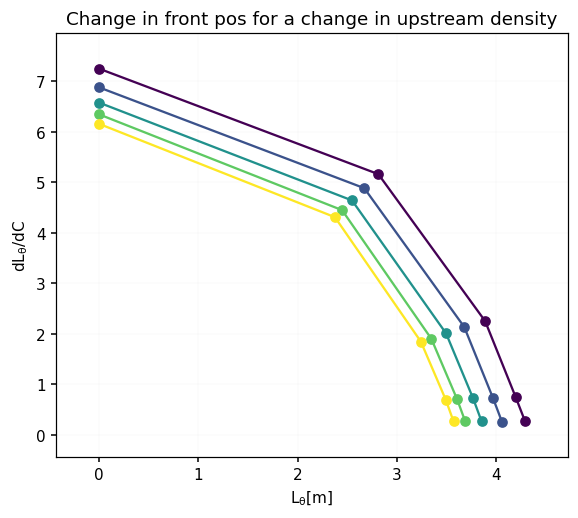

In [55]:
[plt.cm.get_cmap("viridis", 5)(x) for x in range(5)]

fig, ax = plt.subplots()

for i, p in enumerate(profiles):
    s = store[p]
    sens = np.gradient(s["SpolPlot"], s["crel_trim"])
    
    ax.plot(s["SpolPlot"], sens, marker = "o", color = colors[i])
    # ax.plot(store[p]["crel_trim"], store[p]["Splot"], label = p, marker = "o")
    
ax.set_xlabel(r"$L_{\theta} [m]$")
ax.set_ylabel(r"$dL_{\theta} / dC$")
ax.set_title("Change in front pos for a change in upstream density")

In [60]:
profiles

{0.0: <Morph.Profile at 0x20baf125360>,
 0.25: <Morph.Profile at 0x20baed66da0>,
 0.5: <Morph.Profile at 0x20baed65570>,
 0.75: <Morph.Profile at 0x20baed667d0>,
 1.0: <Morph.Profile at 0x20baed64610>}

C:\Users\mikek\AppData\Local\Temp\ipykernel_58272\720109334.py:1: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  [plt.cm.get_cmap("viridis", 5)(x) for x in range(5)]


(0.0, 0.4)

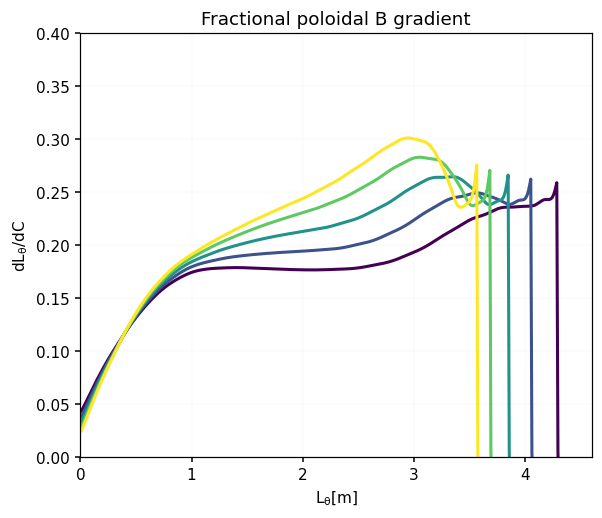

In [72]:
[plt.cm.get_cmap("viridis", 5)(x) for x in range(5)]

fig, ax = plt.subplots()

for i, p in enumerate(profiles):
    s = store[p]
    p = profiles[p]
    Bgrad = np.gradient(p["Btot"], p["Spol"]) / p["Btot"]
    
    ax.plot(p["Spol"], Bgrad, marker = "o", color = colors[i], ms = 0, lw = 2)
    # ax.plot(store[p]["crel_trim"], store[p]["Splot"], label = p, marker = "o")
    
ax.set_xlabel(r"$L_{\theta} [m]$")
ax.set_ylabel(r"$dL_{\theta} / dC$")
ax.set_title("Fractional poloidal B gradient")
ax.set_xlim(0,4.6)
ax.set_ylim(0,0.4)

C:\Users\mikek\AppData\Local\Temp\ipykernel_58272\4144467324.py:1: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  [plt.cm.get_cmap("viridis", 5)(x) for x in range(5)]


TypeError: can't multiply sequence by non-int of type 'float'

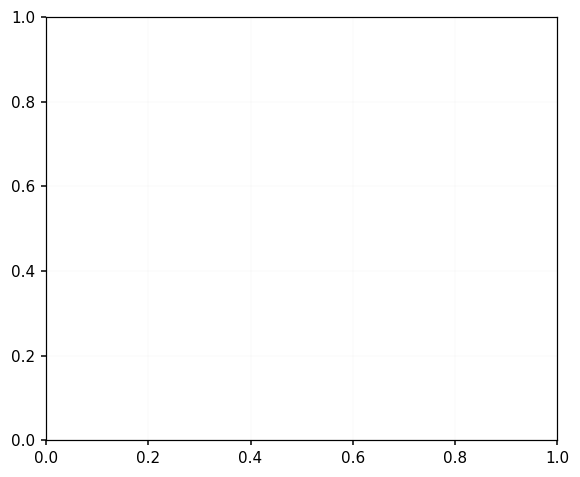

In [91]:
[plt.cm.get_cmap("viridis", 5)(x) for x in range(5)]

fig, ax = plt.subplots()

for i, p in enumerate(profiles):
    s = store[p]
    p = profiles[p]
    Bgrad = np.gradient(p["Btot"], p["Spol"]) / p["Btot"]
    
    ax.plot(p["Spol"],  p["S"] * (7/2) , marker = "o", color = colors[i], ms = 0, lw = 2)
    # ax.plot(store[p]["crel_trim"], store[p]["Splot"], label = p, marker = "o")
    
ax.set_xlabel(r"$L_{\theta} [m]$")
ax.set_ylabel(r"$\frac{2}{7} \ \frac{1}{L_{\parallel,f}} \frac{B_f}{B_{\theta,f}}$", fontsize = 18, rotation = 0, labelpad = 40)
ax.set_title("Magnetic pitch")
ax.set_xlim(0,4.6)
ax.set_ylim(0,0.4)

In [ ]:
[plt.cm.get_cmap("viridis", 5)(x) for x in range(5)]

fig, ax = plt.subplots()

for i, p in enumerate(profiles):
    s = store[p]
    p = profiles[p]
    Bgrad = np.gradient(p["Btot"], p["Spol"]) / p["Btot"]
    
    ax.plot(p["Spol"], (2/7) * p["Bpol"] / (p["S"] * p["Btot"]), marker = "o", color = colors[i], ms = 0, lw = 2)
    # ax.plot(store[p]["crel_trim"], store[p]["Splot"], label = p, marker = "o")
    
ax.set_xlabel(r"$L_{\theta} [m]$")
ax.set_ylabel(r"$\frac{2}{7} \ \frac{1}{L_{\parallel,f}} \frac{B_f}{B_{\theta,f}}$", fontsize = 18, rotation = 0, labelpad = 40)
ax.set_title("Magnetic pitch")
ax.set_xlim(0,4.6)
ax.set_ylim(0,0.4)